In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
from importlib import reload

import utils2p

In [2]:
NOTEBOOK_DIR = os.getcwd()
MODULE_DIR, _ = os.path.split(NOTEBOOK_DIR)
sys.path.append(MODULE_DIR)

In [3]:
!$CONDA_DEFAULT_ENV

/bin/bash: longterm37: command not found


In [4]:
from longterm import load, utils
import longterm
from longterm.pipeline import PreProcessFly, PreProcessParams

In [5]:
fly_dirs = [os.path.join(load.NAS_DIR_LH, "210415", "J1M5_fly2"),
                os.path.join(load.NAS_DIR_LH, "210423_caffeine", "J1M5_fly2"),
                os.path.join(load.NAS_DIR_LH, "210427_caffeine", "J1M5_fly1"),
                os.path.join(load.NAS2_DIR_LH, "210512", "fly3"),
                os.path.join(load.NAS2_DIR_LH, "210514", "fly1")]

all_selected_trials = [[2,3,5,7],
                       [1,4,5,11],
                       [2,3,4,10],
                       [2,4,5,11],
                       [0,5,6,12]]

In [8]:
preprocess_list = []
for i_fly, (fly_dir, selected_trials) in enumerate(zip(fly_dirs, all_selected_trials)):
    params = PreProcessParams()
    params.use_warp = False
    params.use_denoise = False
    params.use_dff = False
    params.make_dff_videos = False
    params.dff = "dff_denoised_t1.tif"
    params.green_denoised = "green_denoised_t1.tif"

    preprocess = PreProcessFly(fly_dir, params=params, trial_dirs="fromfile", 
                               selected_trials=selected_trials,
                               beh_trial_dirs="fromfile", sync_trial_dirs="fromfile")
    preprocess_list.append(preprocess)

In [82]:
pickle_dirs = [os.path.join(preprocess.fly_processed_dir, "compare_trials.pkl") for preprocess in preprocess_list]
pickle_raw_dirs = [os.path.join(preprocess.fly_processed_dir, "compare_trials_raw.pkl") for preprocess in preprocess_list]

In [13]:
import pickle

In [83]:
dicts = []
for pickle_dir in pickle_dirs:
    with open(pickle_dir, "rb") as f:
        data = pickle.load(f)
        dicts.append(data)
        
dicts_raw = []
for pickle_dir in pickle_raw_dirs:
    with open(pickle_dir, "rb") as f:
        data = pickle.load(f)
        dicts_raw.append(data)

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/NAS2/LH/210514/fly1/processed/compare_trials_raw.pkl'

In [57]:
list(dicts[0].keys())

['dff_means',
 'dff_mean_diffs',
 'green_means',
 'green_mean_diffs',
 'dff_stds',
 'dff_std_diffs',
 'green_stds',
 'green_std_diffs',
 'dff_quants',
 'dff_quant_diffs',
 'green_quants',
 'green_quant_diffs']

In [58]:
masks = [os.path.join(preprocess.fly_processed_dir, "dff_mask_denoised_t1.tif") for preprocess in preprocess_list]
masks = [utils.get_stack(mask) == 0 for mask in masks]

In [87]:
for i_fly, (mask, this_dict) in enumerate(zip(masks, dicts)):
    for key in list(this_dict.keys()):
        for i_trial in range(4):
            dicts[i_fly][key][i_trial][mask] = 0
            # dicts_raw[i_fly][key][i_trial][mask] = 0

<IPython.core.display.Javascript object>


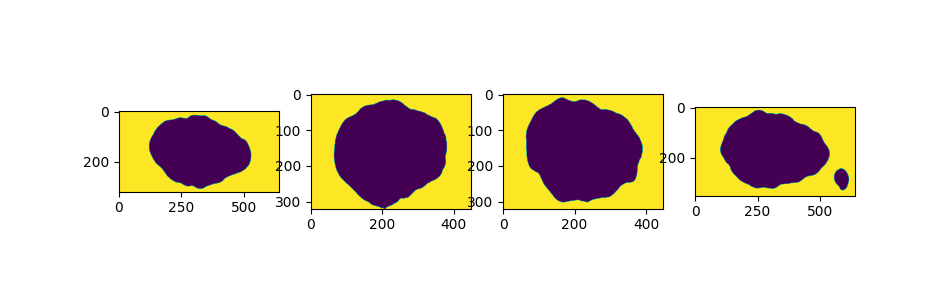

In [67]:
%matplotlib notebook
fi, axs = plt.subplots(nrows=1, ncols=4, figsize=(9.5, 3))
for i_ax, ax in enumerate(axs):
    ax.imshow(masks[i_ax])

In [73]:
from matplotlib.backends.backend_pdf import PdfPages

In [77]:
out_file = "/mnt/NAS2/JB/longterm/dff_beh_videos/compare_dff.pdf"

<IPython.core.display.Javascript object>


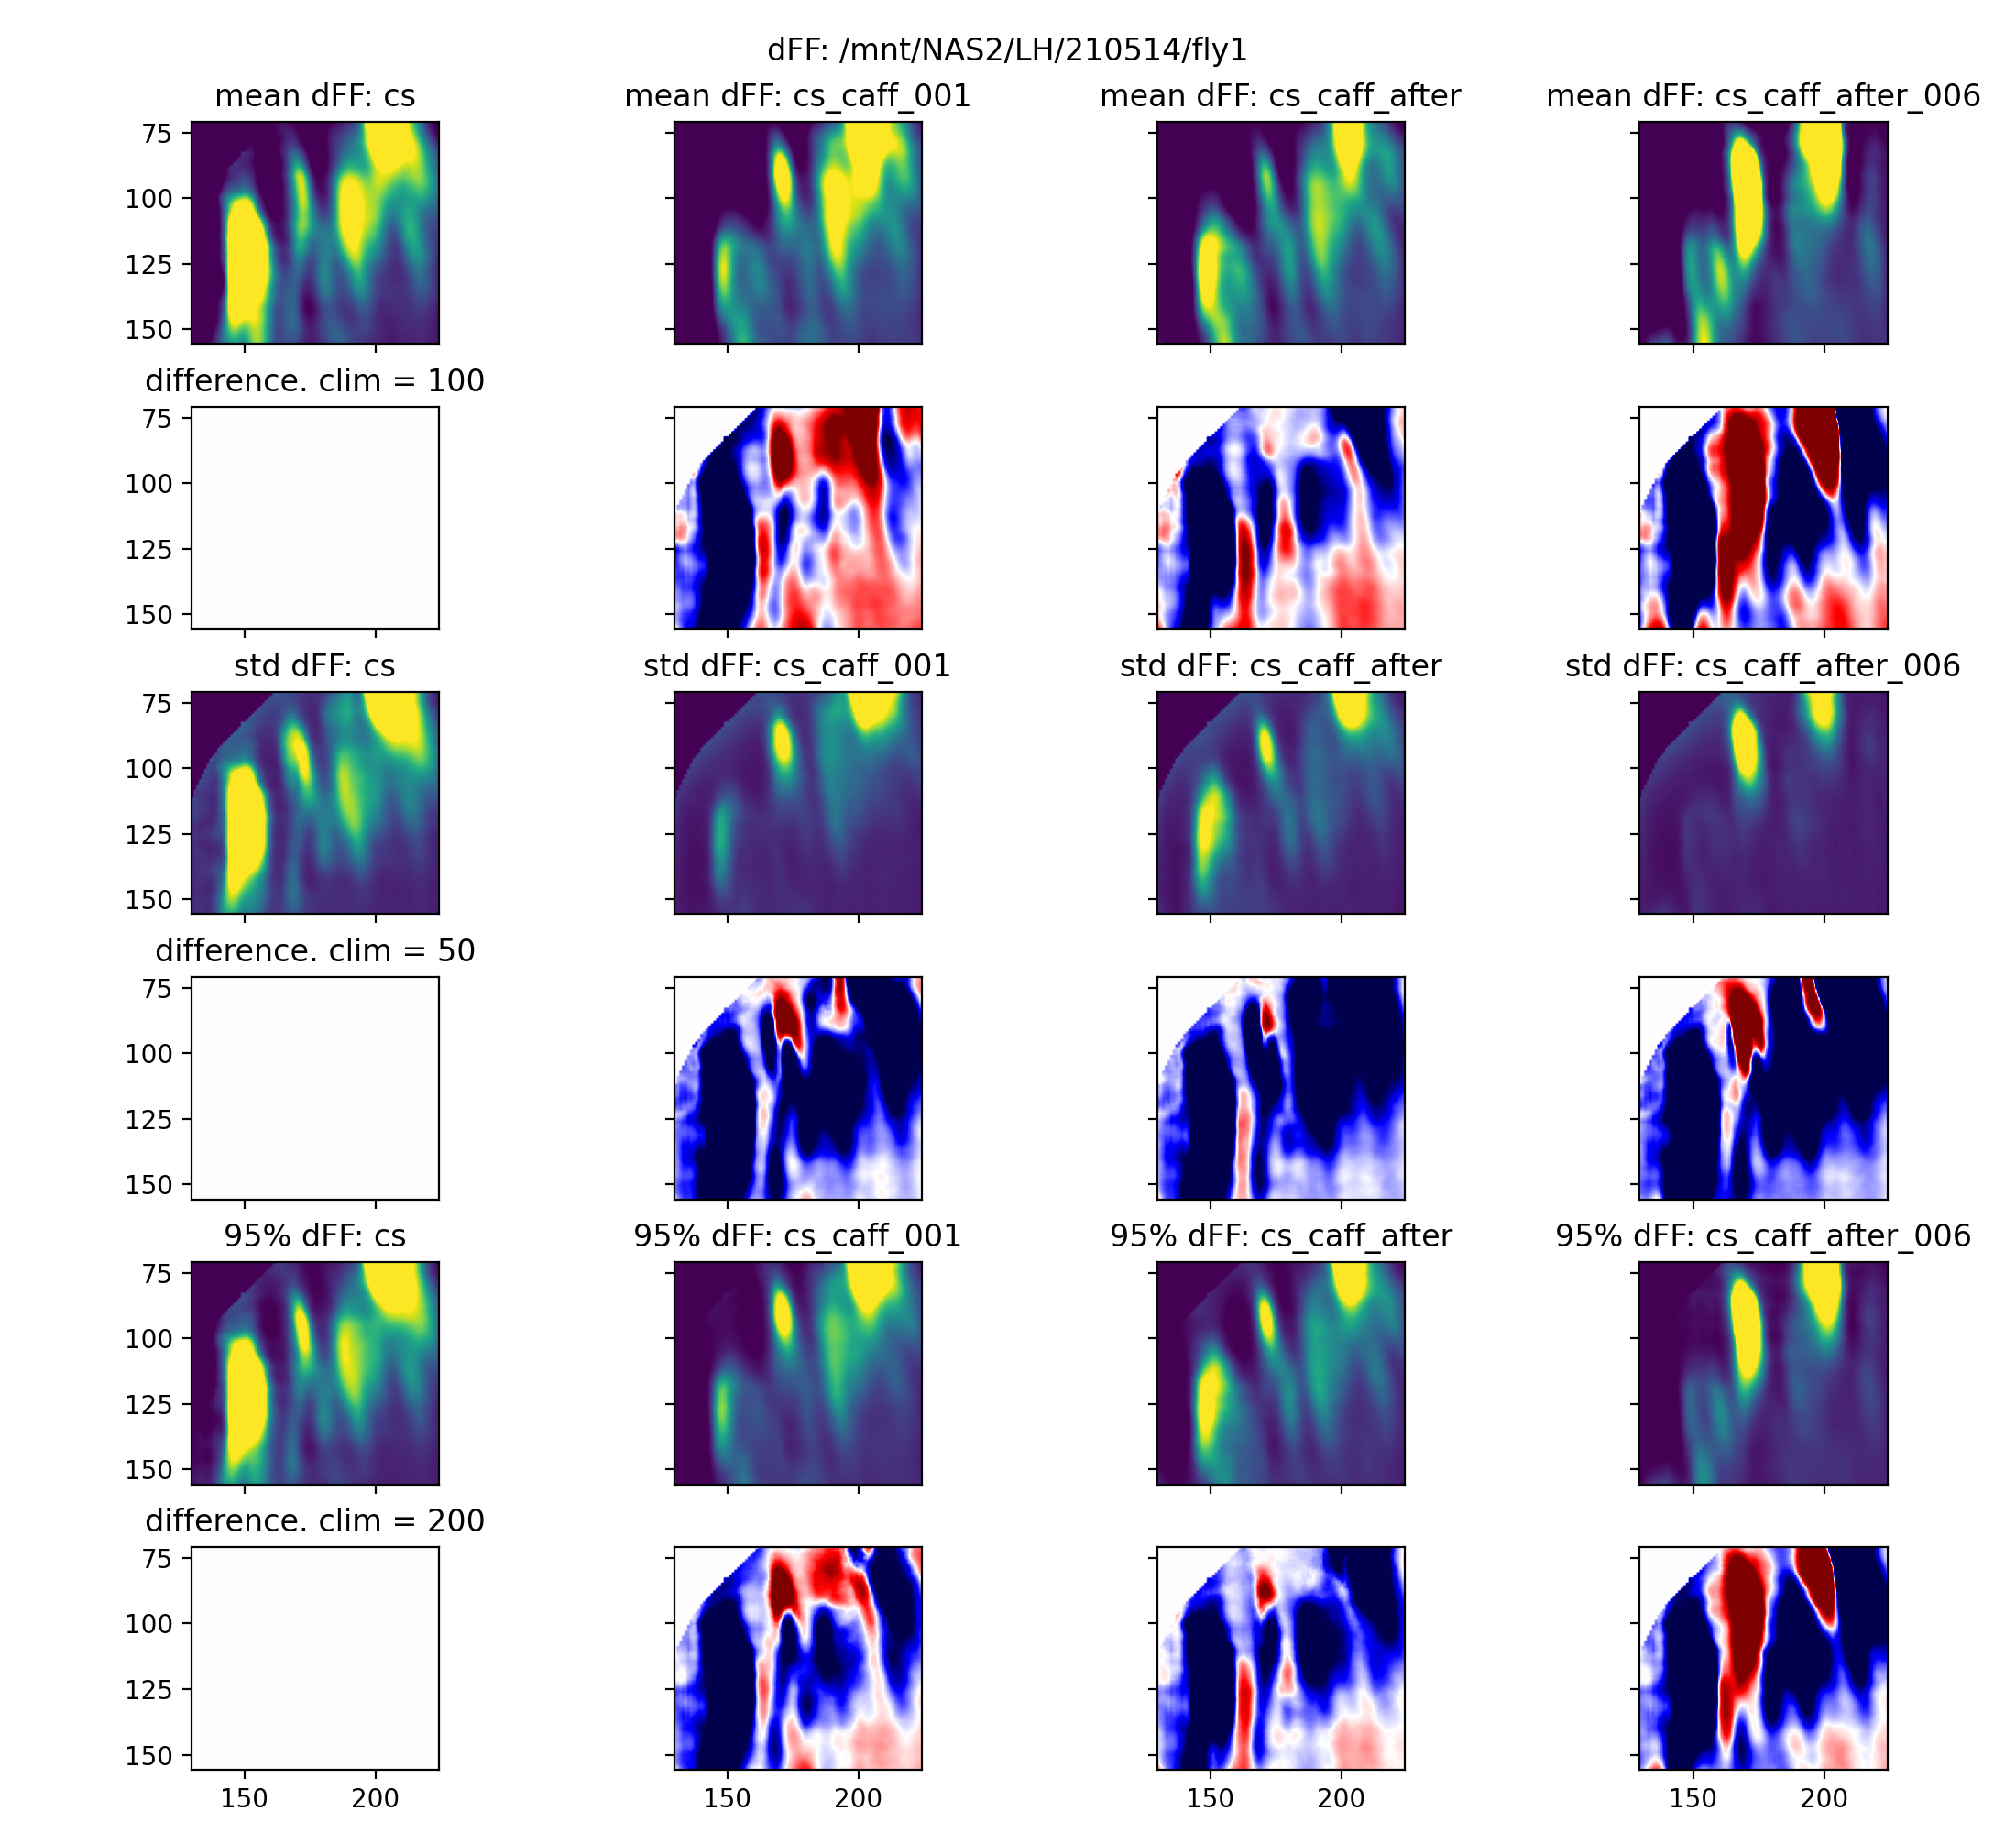

In [90]:
%matplotlib notebook
i_fly = 4
# denoised dff
fig, axs = plt.subplots(ncols=4, nrows=6, figsize=(11, 10), sharex=True, sharey=True)
for i_trial in np.arange(4):
    plt.suptitle("dFF: " + preprocess_list[i_fly].fly_dir)
    if i_trial == 0:
        clim0 = [0, np.quantile(dicts[i_fly]["dff_means"][i_trial], 0.98)]
        clim1 = 100
        axs[1, 0].set_title("difference. clim = {}".format(clim1))
        clim2 = [0, np.quantile(dicts[i_fly]["dff_stds"][i_trial], 0.98)]
        clim3 = 50
        axs[3, 0].set_title("difference. clim = {}".format(clim3))
        clim4 = [0, np.quantile(dicts[i_fly]["dff_quants"][i_trial], 0.98)]
        clim5 = 200
        axs[5, 0].set_title("difference. clim = {}".format(clim5))
    axs[0, i_trial].imshow(dicts[i_fly]["dff_means"][i_trial], clim=clim0)
    axs[0, i_trial].set_title("mean dFF: "+ preprocess_list[i_fly].trial_names[i_trial])
    axs[1, i_trial].imshow(dicts[i_fly]["dff_mean_diffs"][i_trial], clim=[-clim1, clim1], cmap=plt.cm.get_cmap("seismic"))
    axs[2, i_trial].imshow(dicts[i_fly]["dff_stds"][i_trial], clim=clim2)
    axs[2, i_trial].set_title("std dFF: "+ preprocess_list[i_fly].trial_names[i_trial])
    axs[3, i_trial].imshow(dicts[i_fly]["dff_std_diffs"][i_trial], clim=[-clim3, clim3], cmap=plt.cm.get_cmap("seismic"))
    axs[4, i_trial].imshow(dicts[i_fly]["dff_quants"][i_trial], clim=clim4)
    axs[4, i_trial].set_title("95% dFF: "+ preprocess_list[i_fly].trial_names[i_trial])
    axs[5, i_trial].imshow(dicts[i_fly]["dff_quant_diffs"][i_trial], clim=[-clim5,clim5], cmap=plt.cm.get_cmap("seismic"))

fig.tight_layout()


<IPython.core.display.Javascript object>


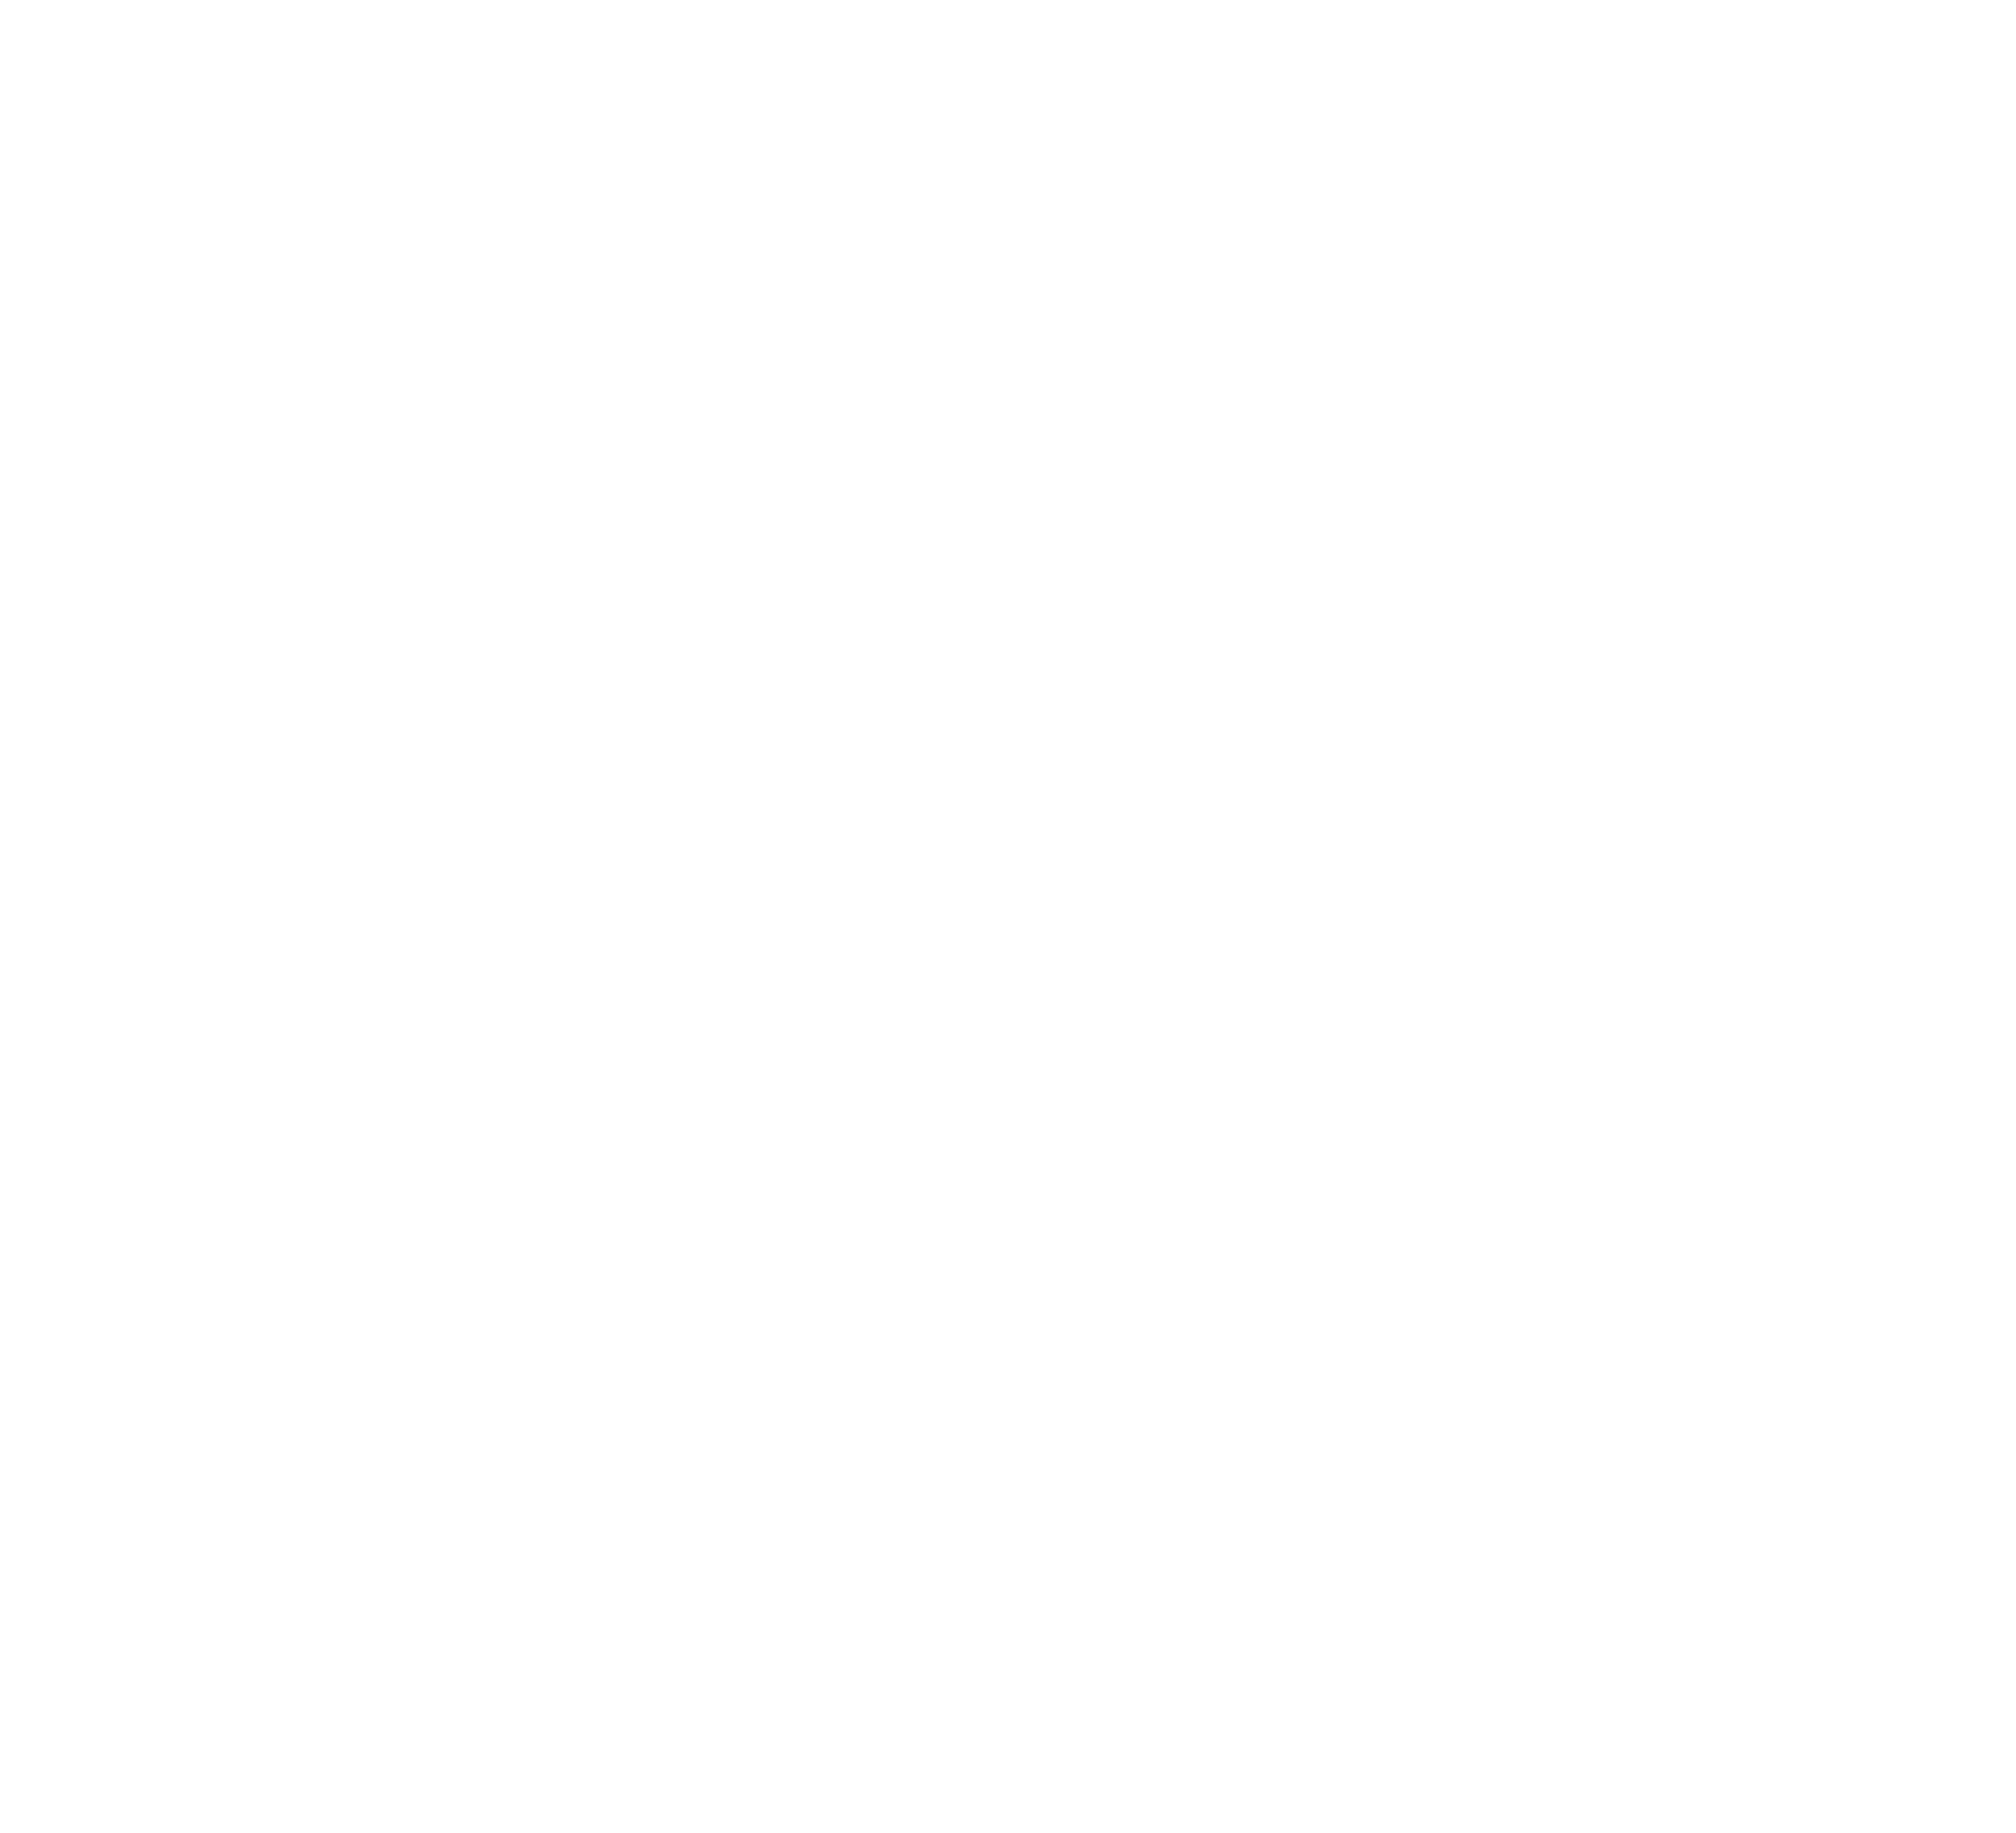

<IPython.core.display.Javascript object>


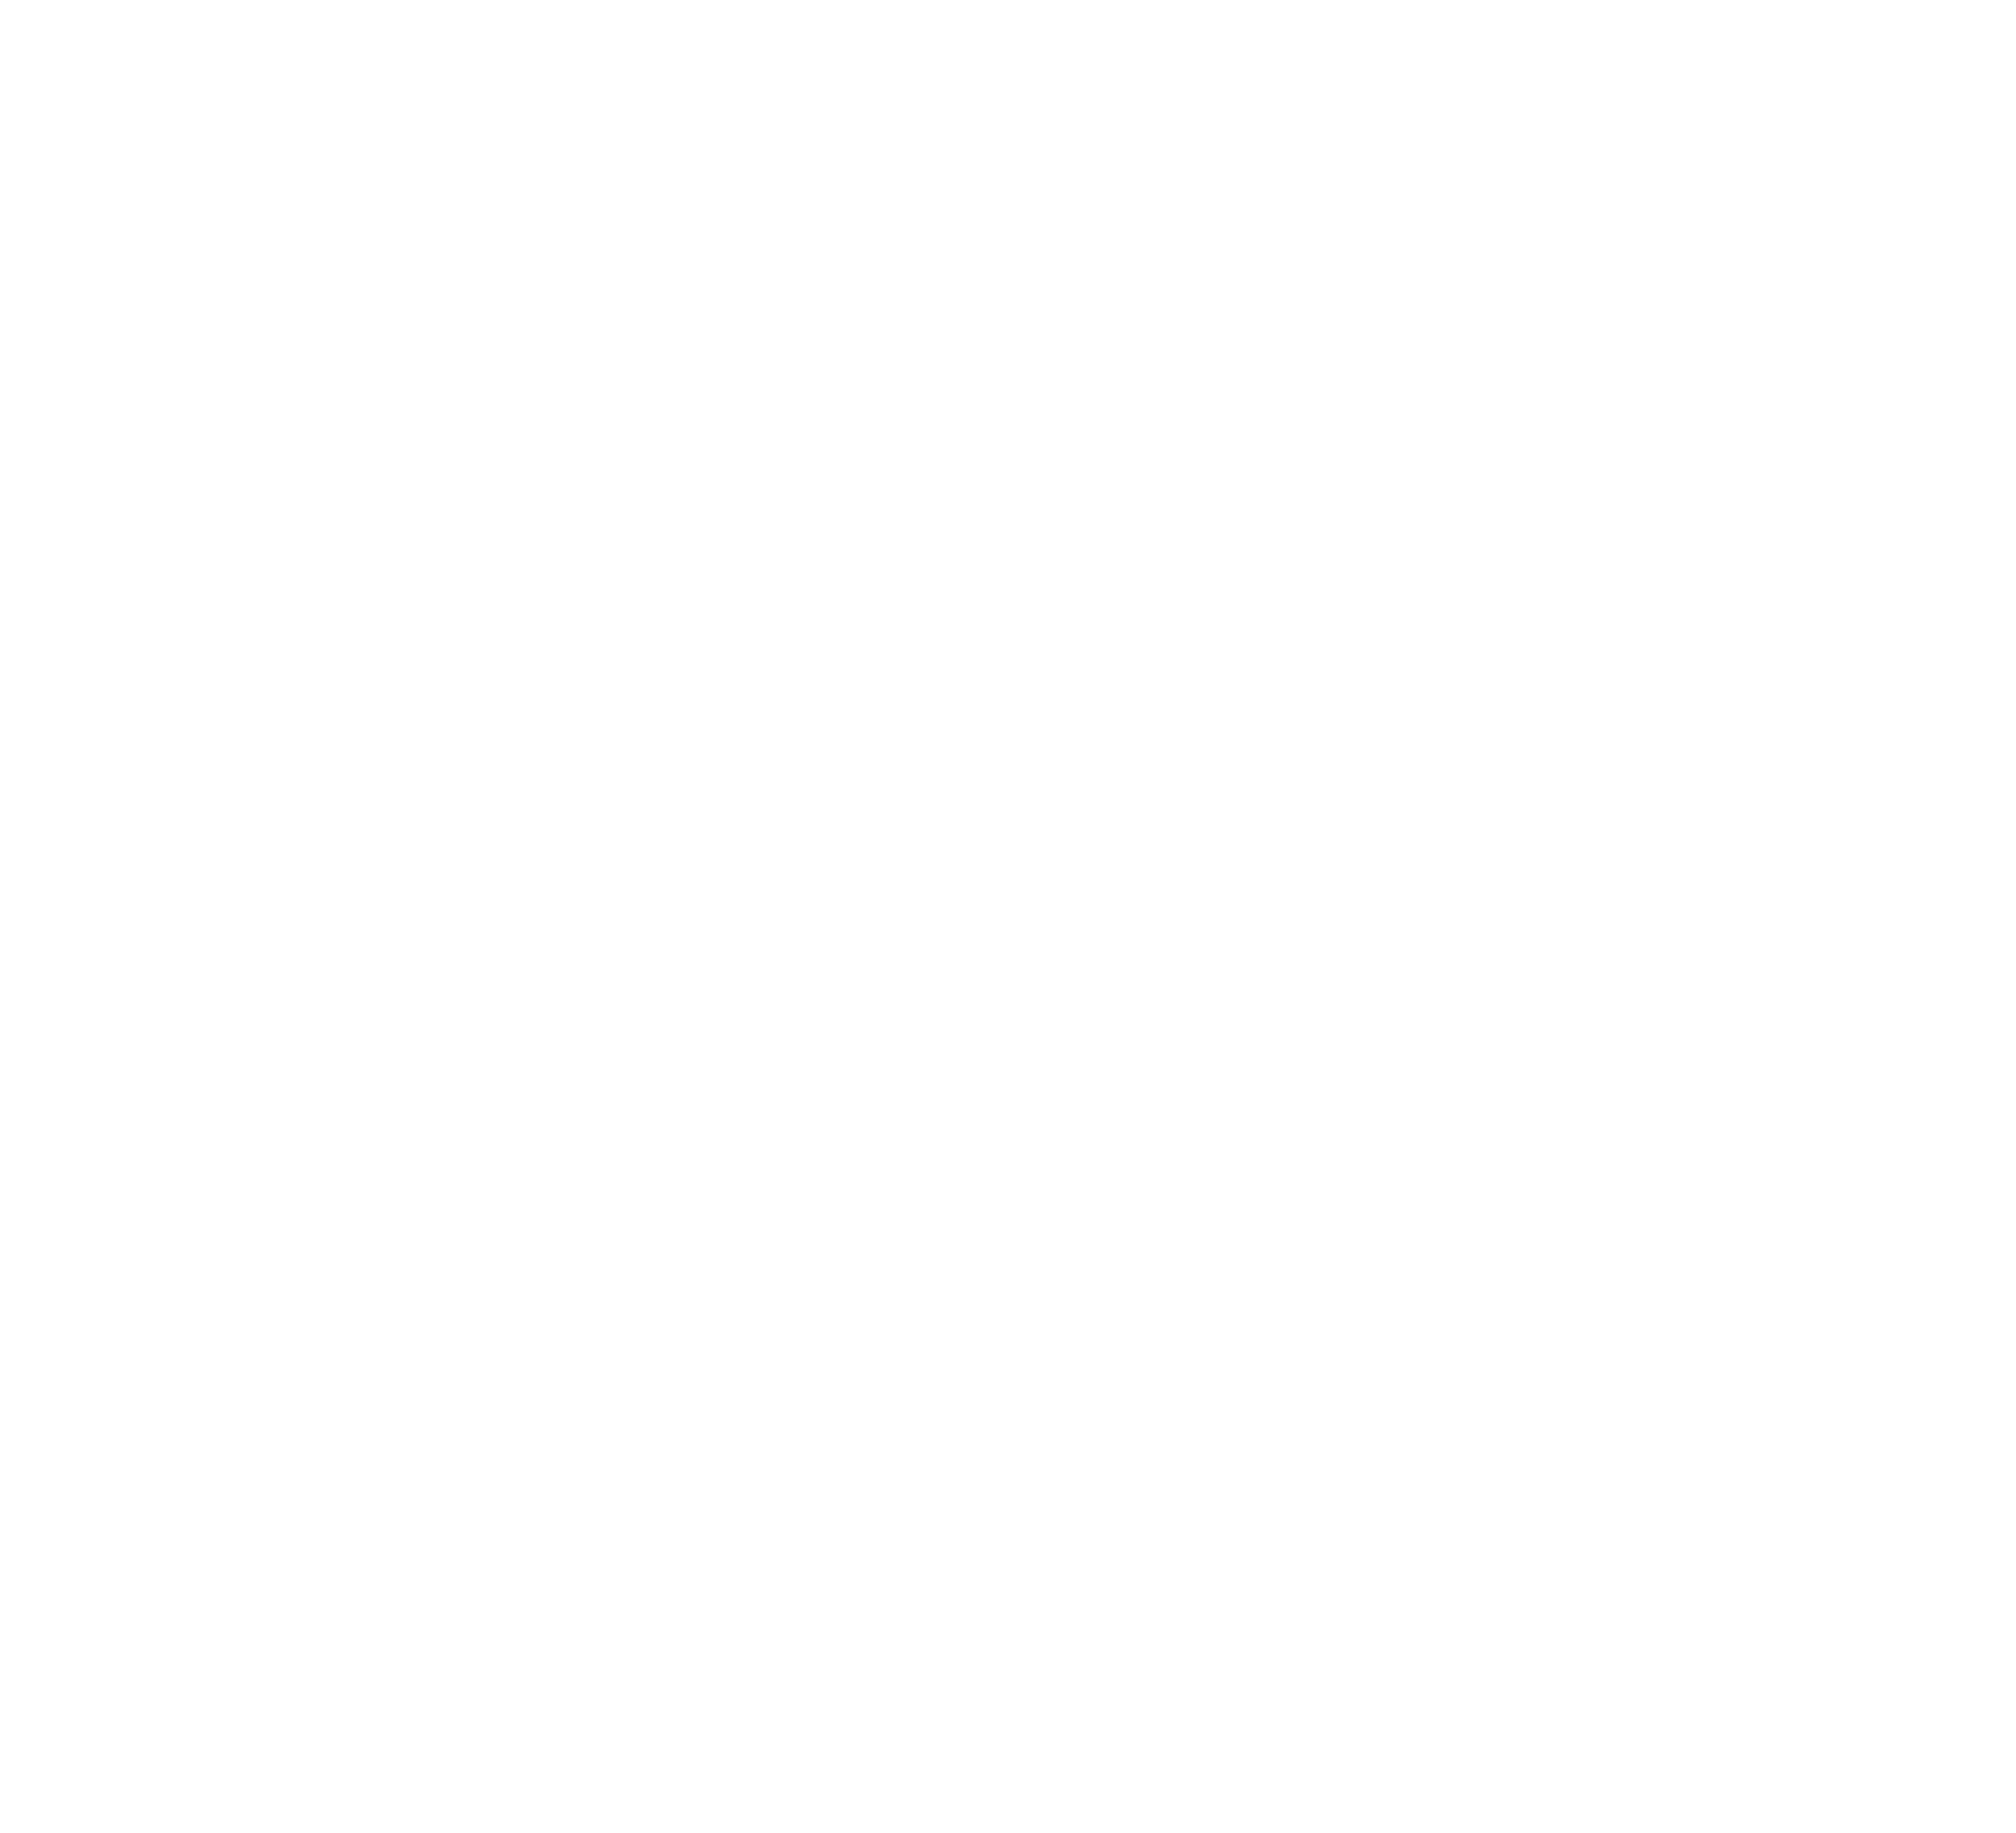

<IPython.core.display.Javascript object>


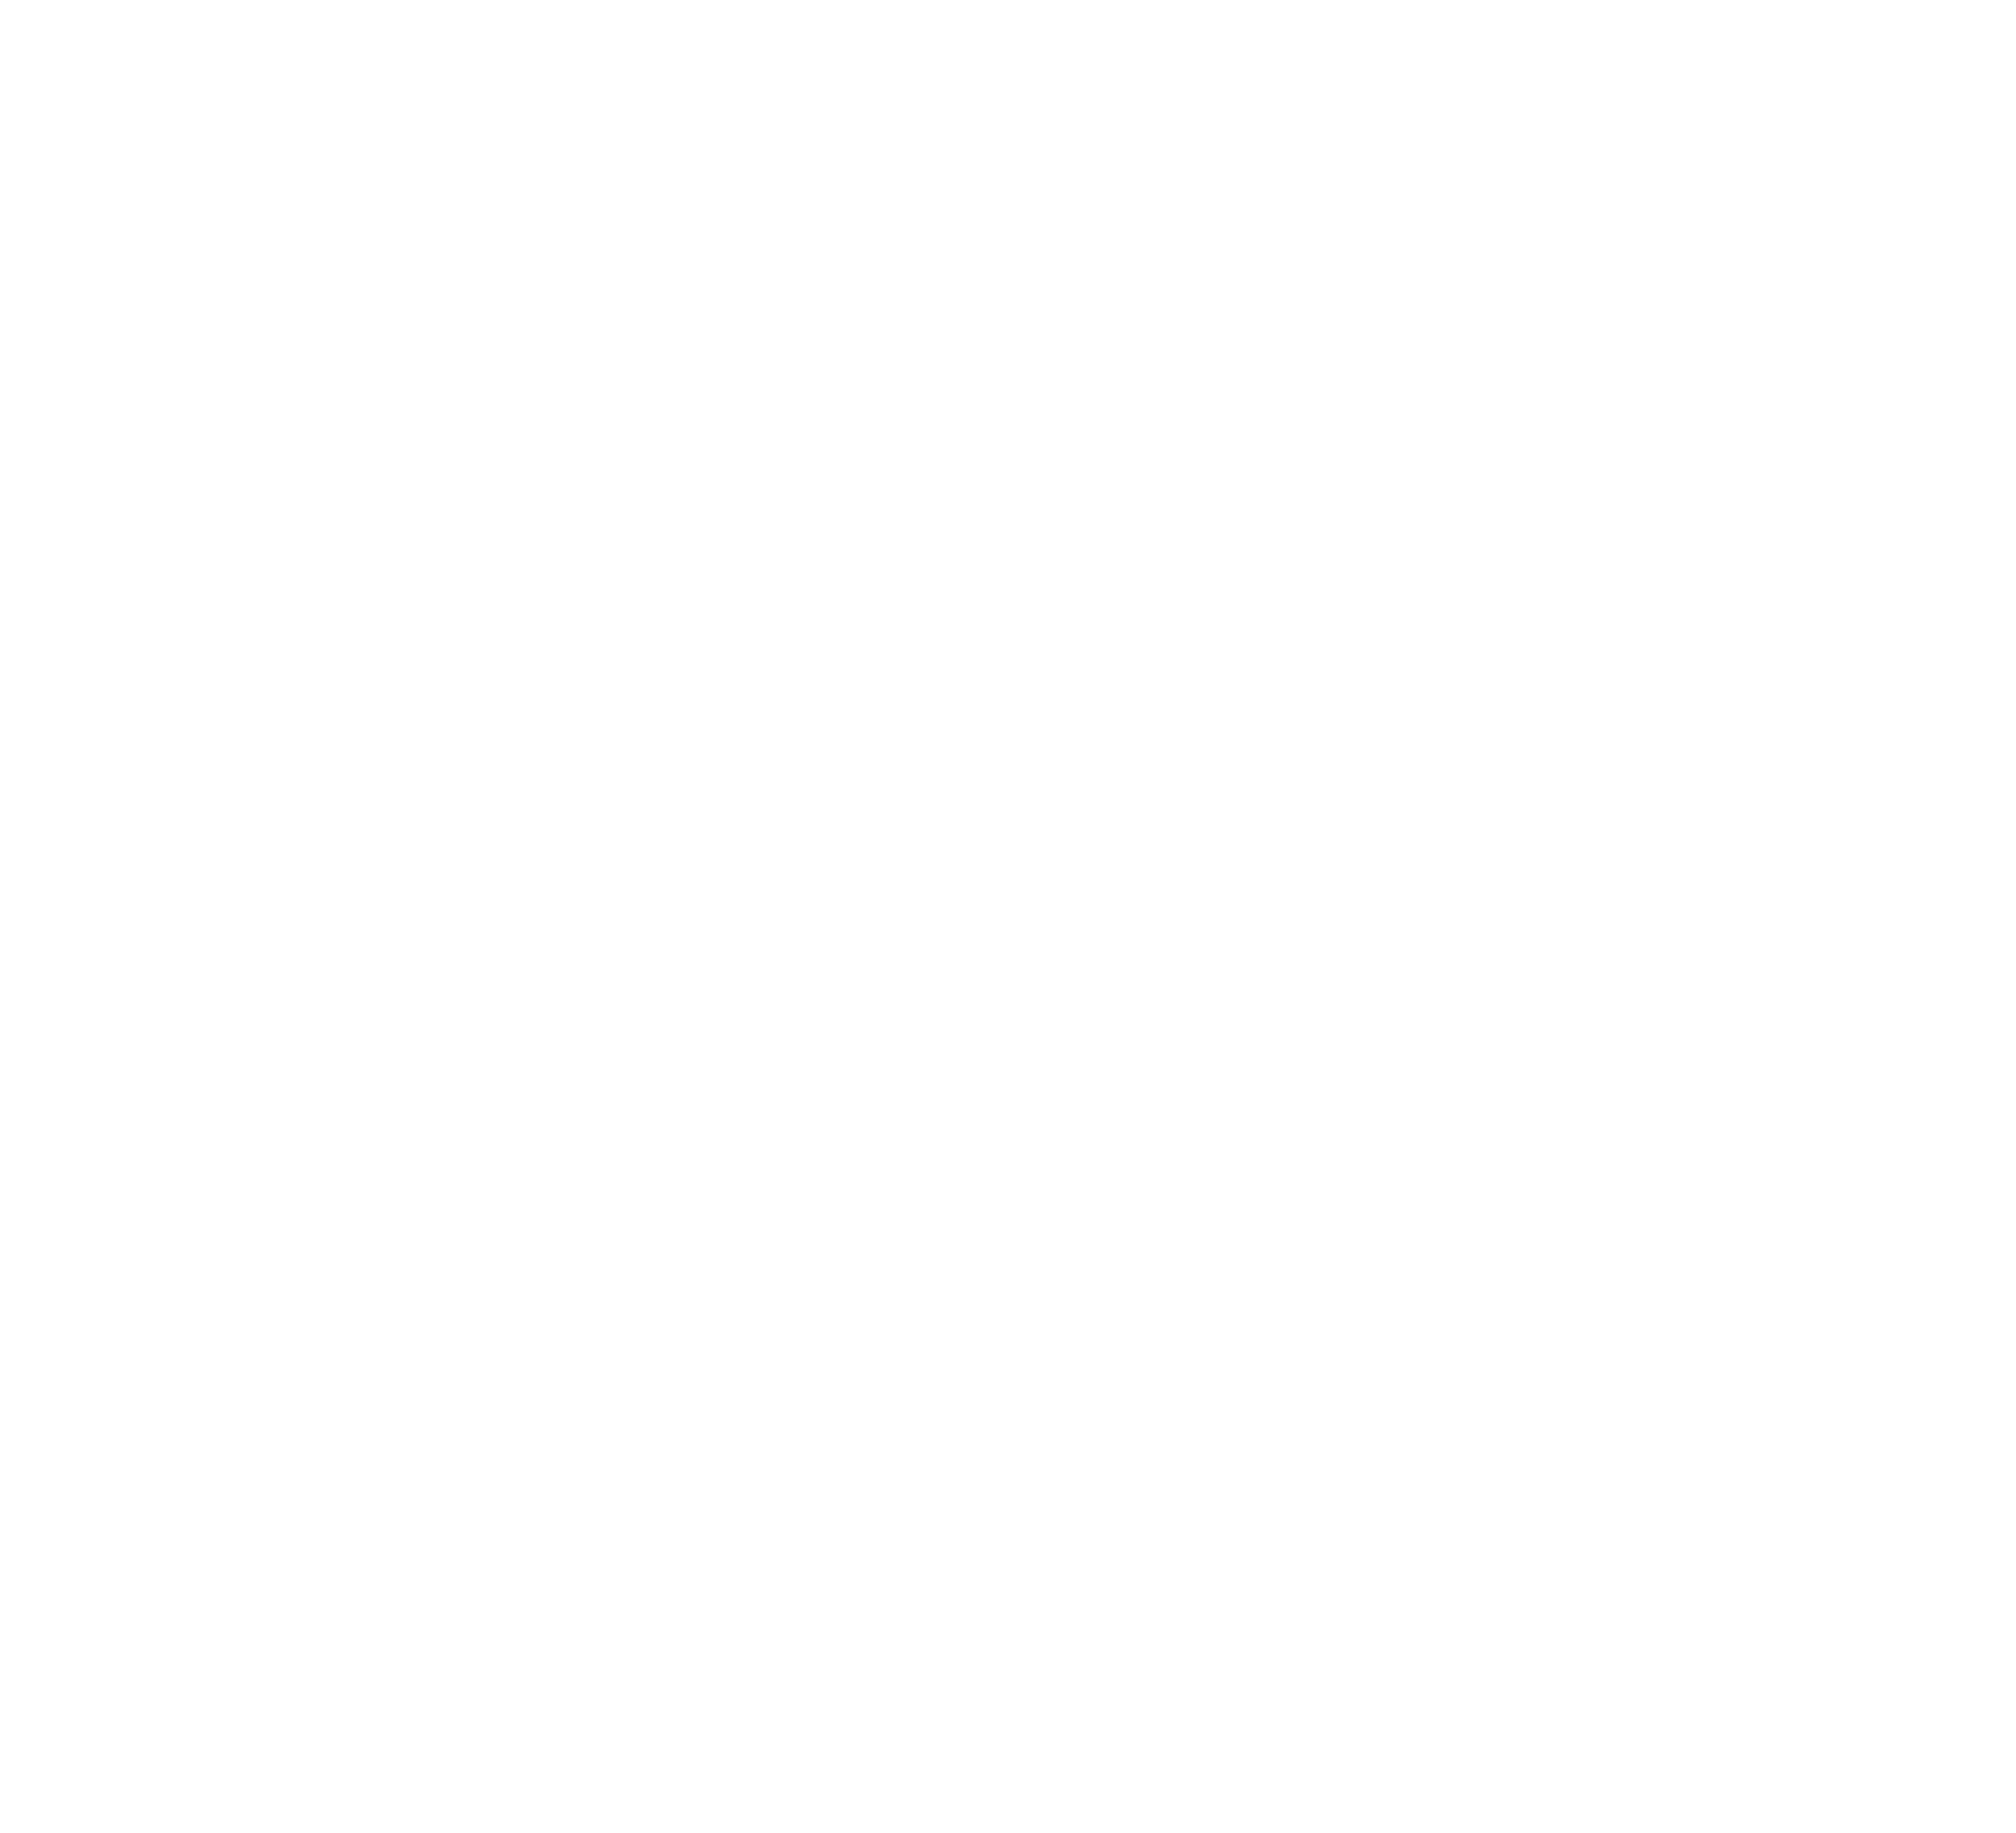

<IPython.core.display.Javascript object>


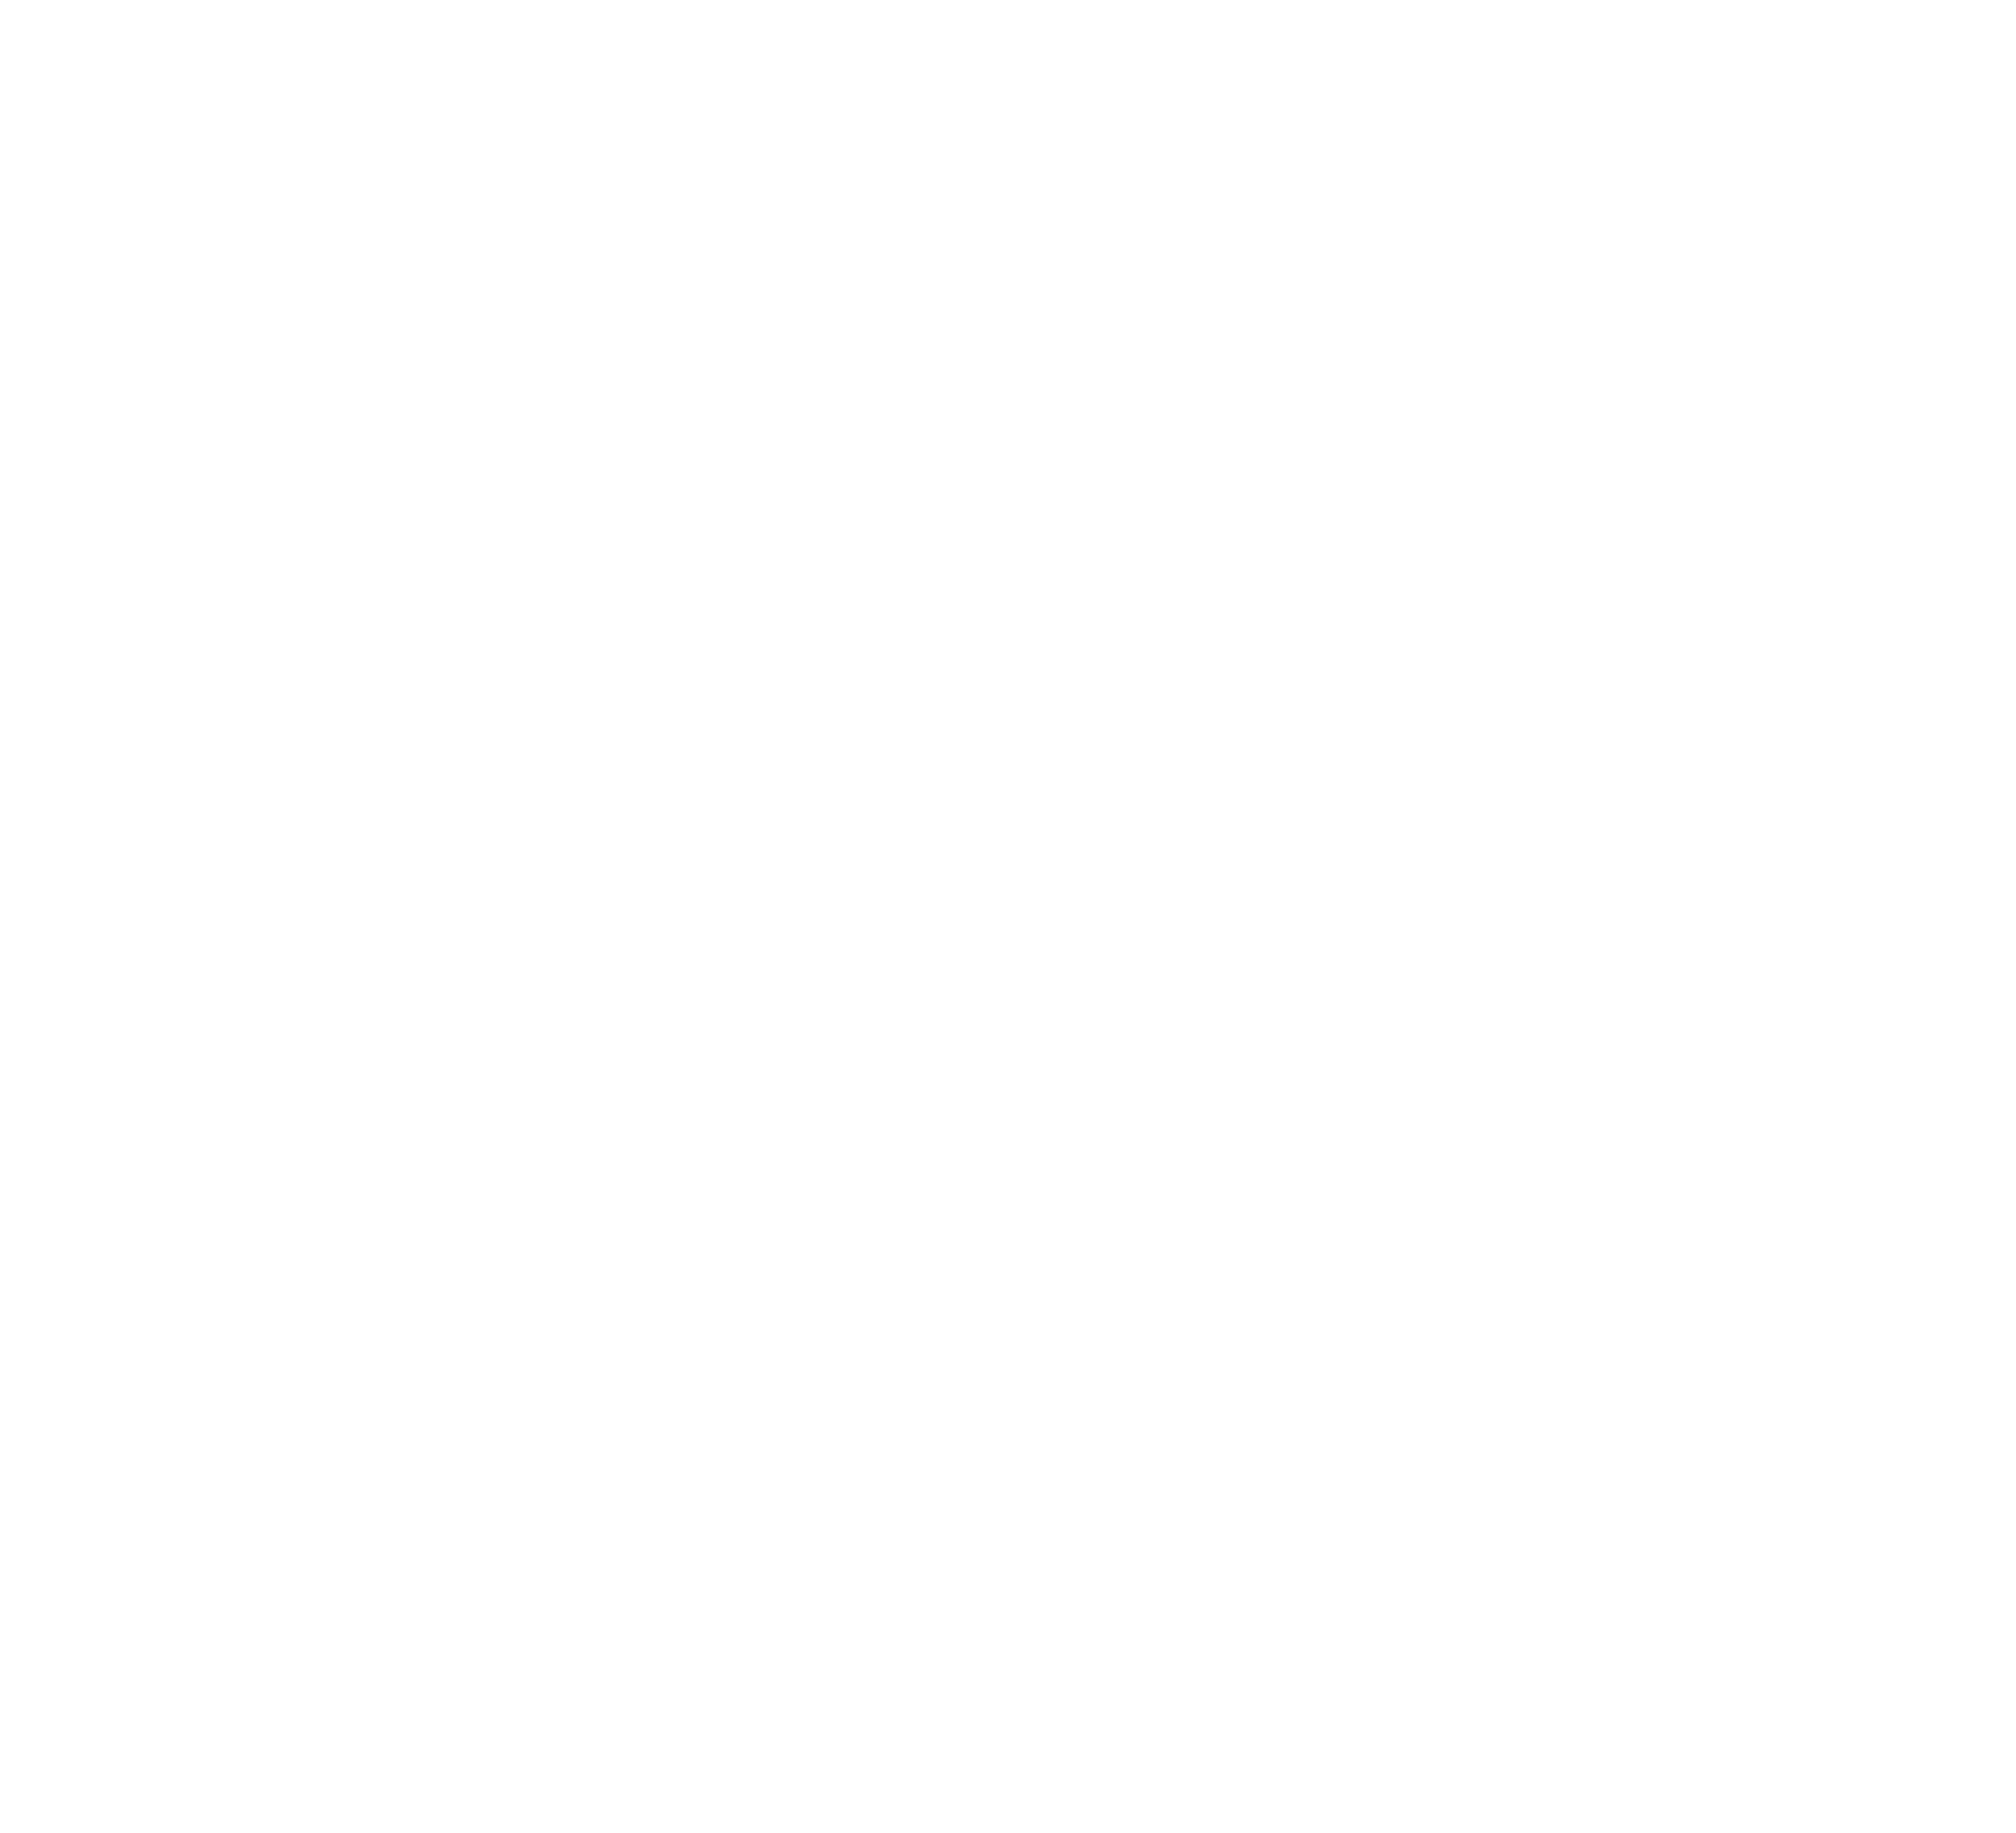

<IPython.core.display.Javascript object>


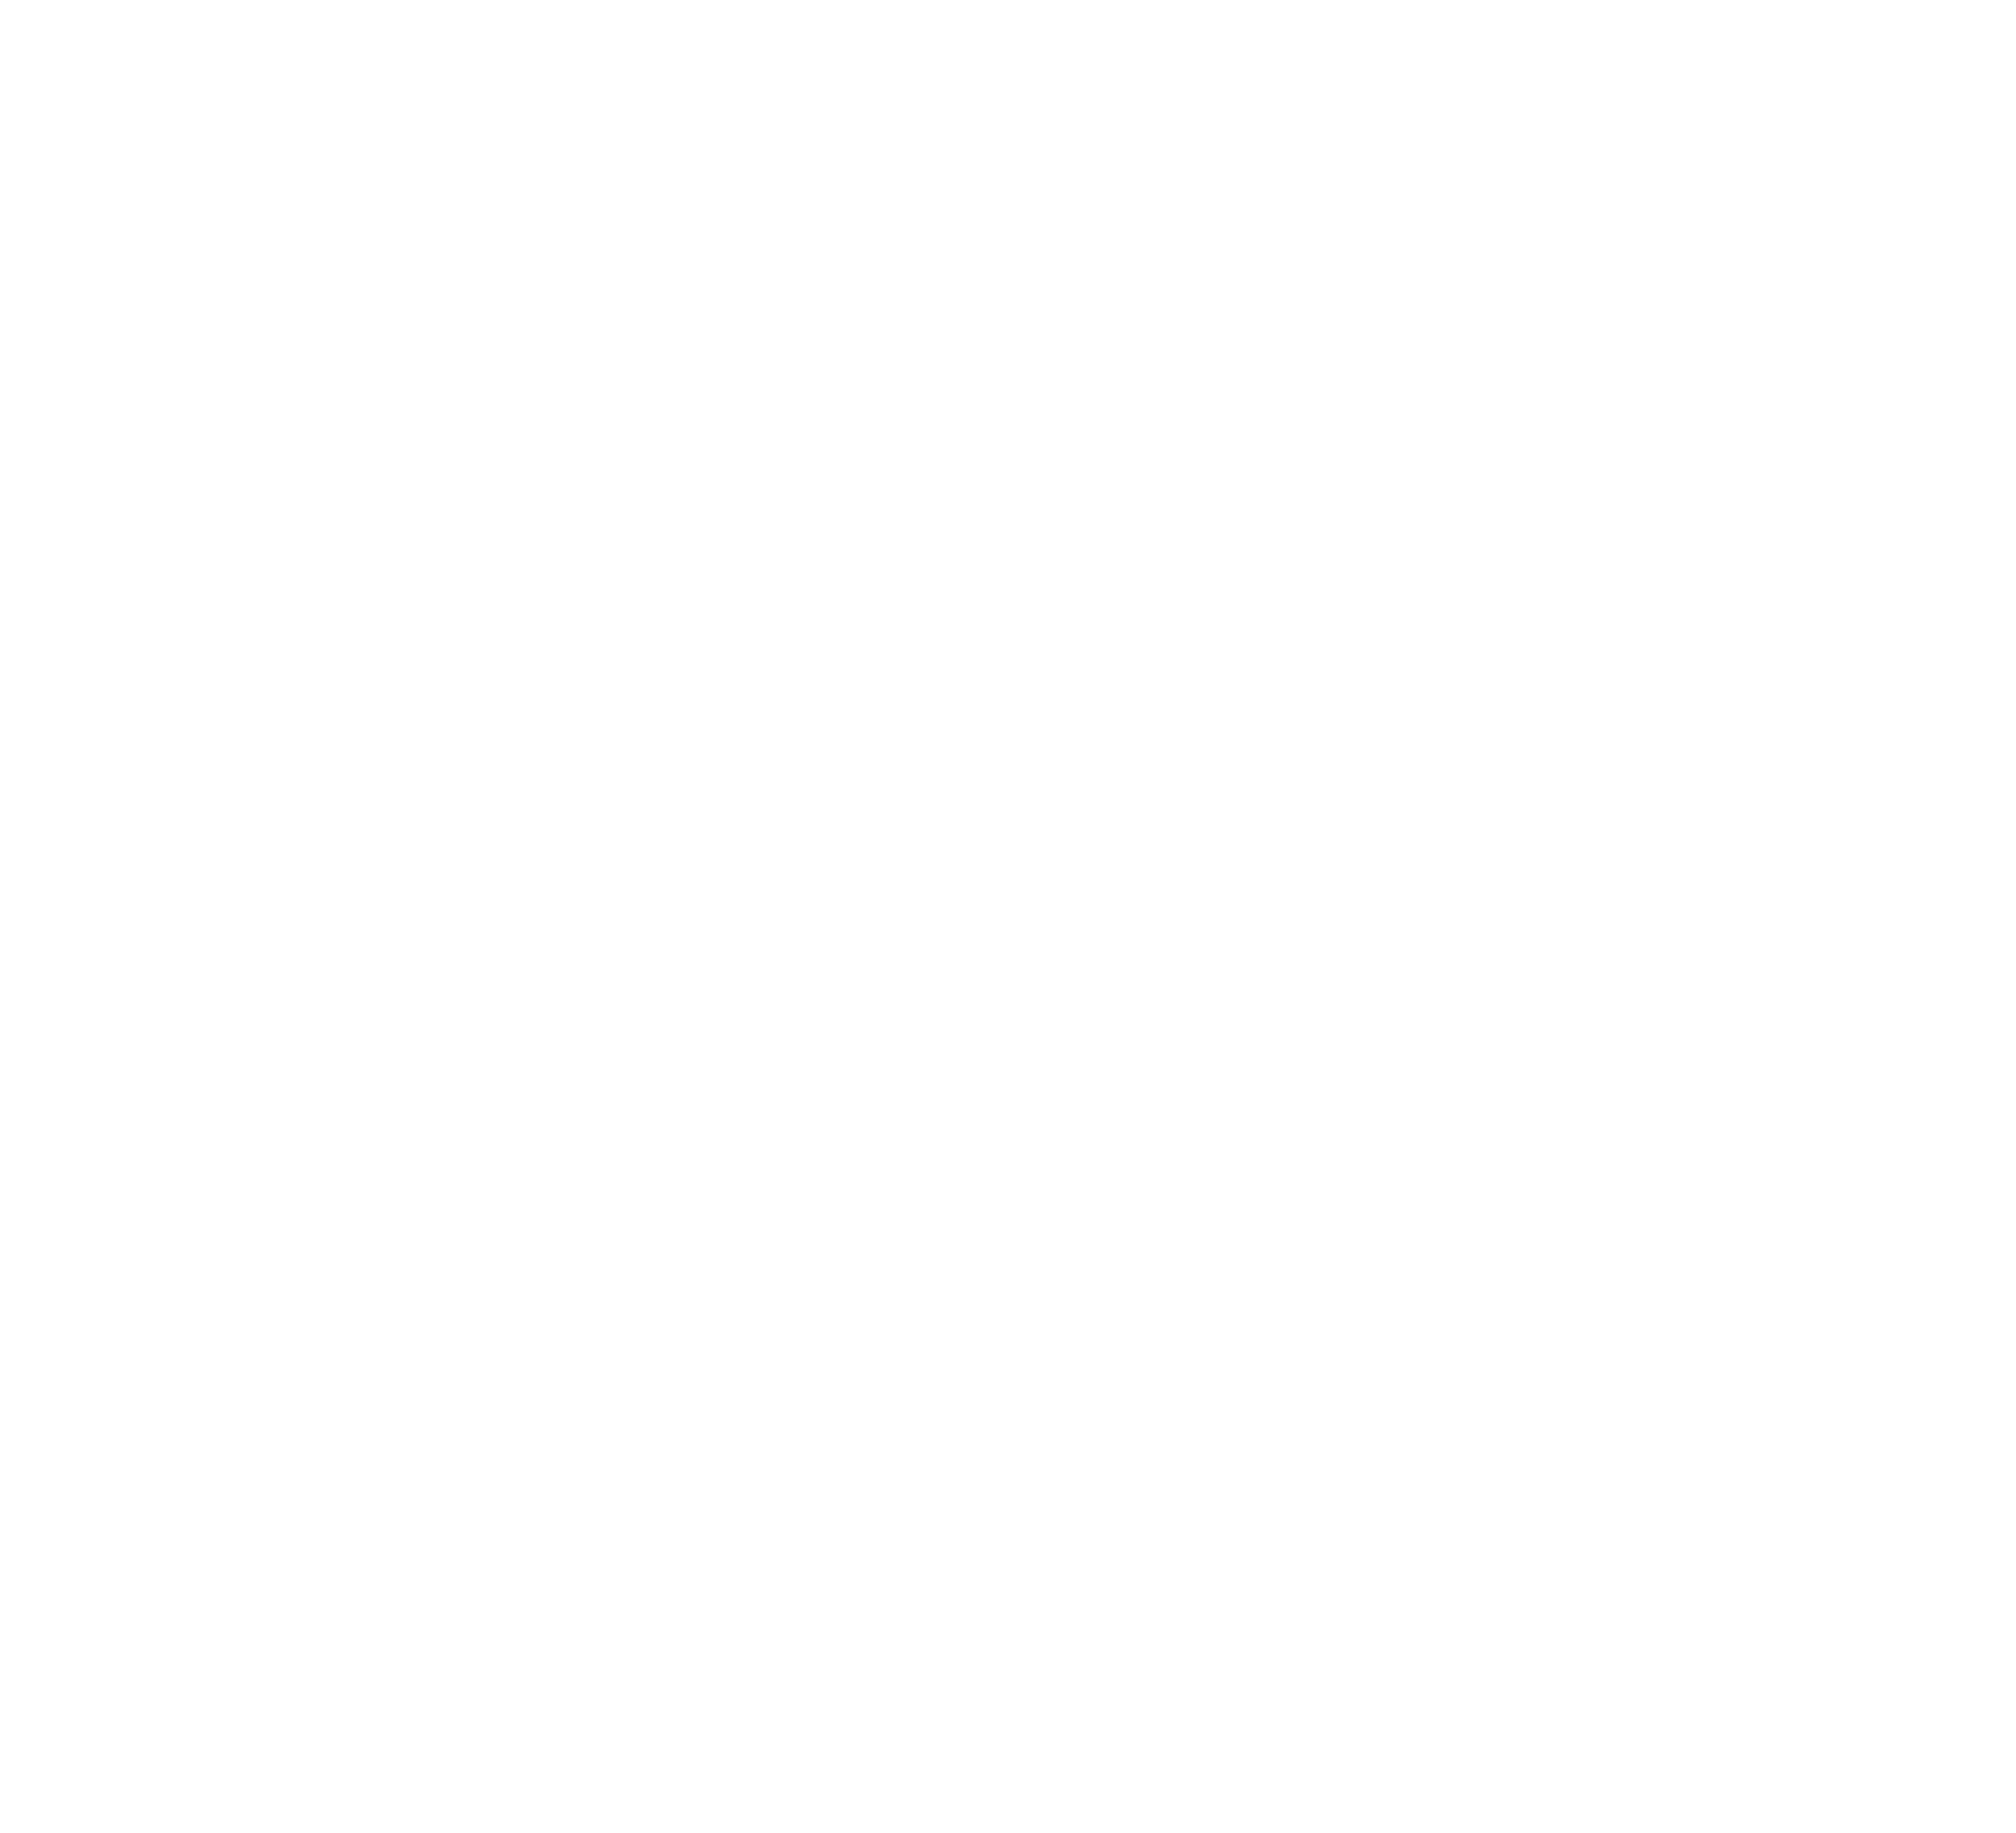

<IPython.core.display.Javascript object>


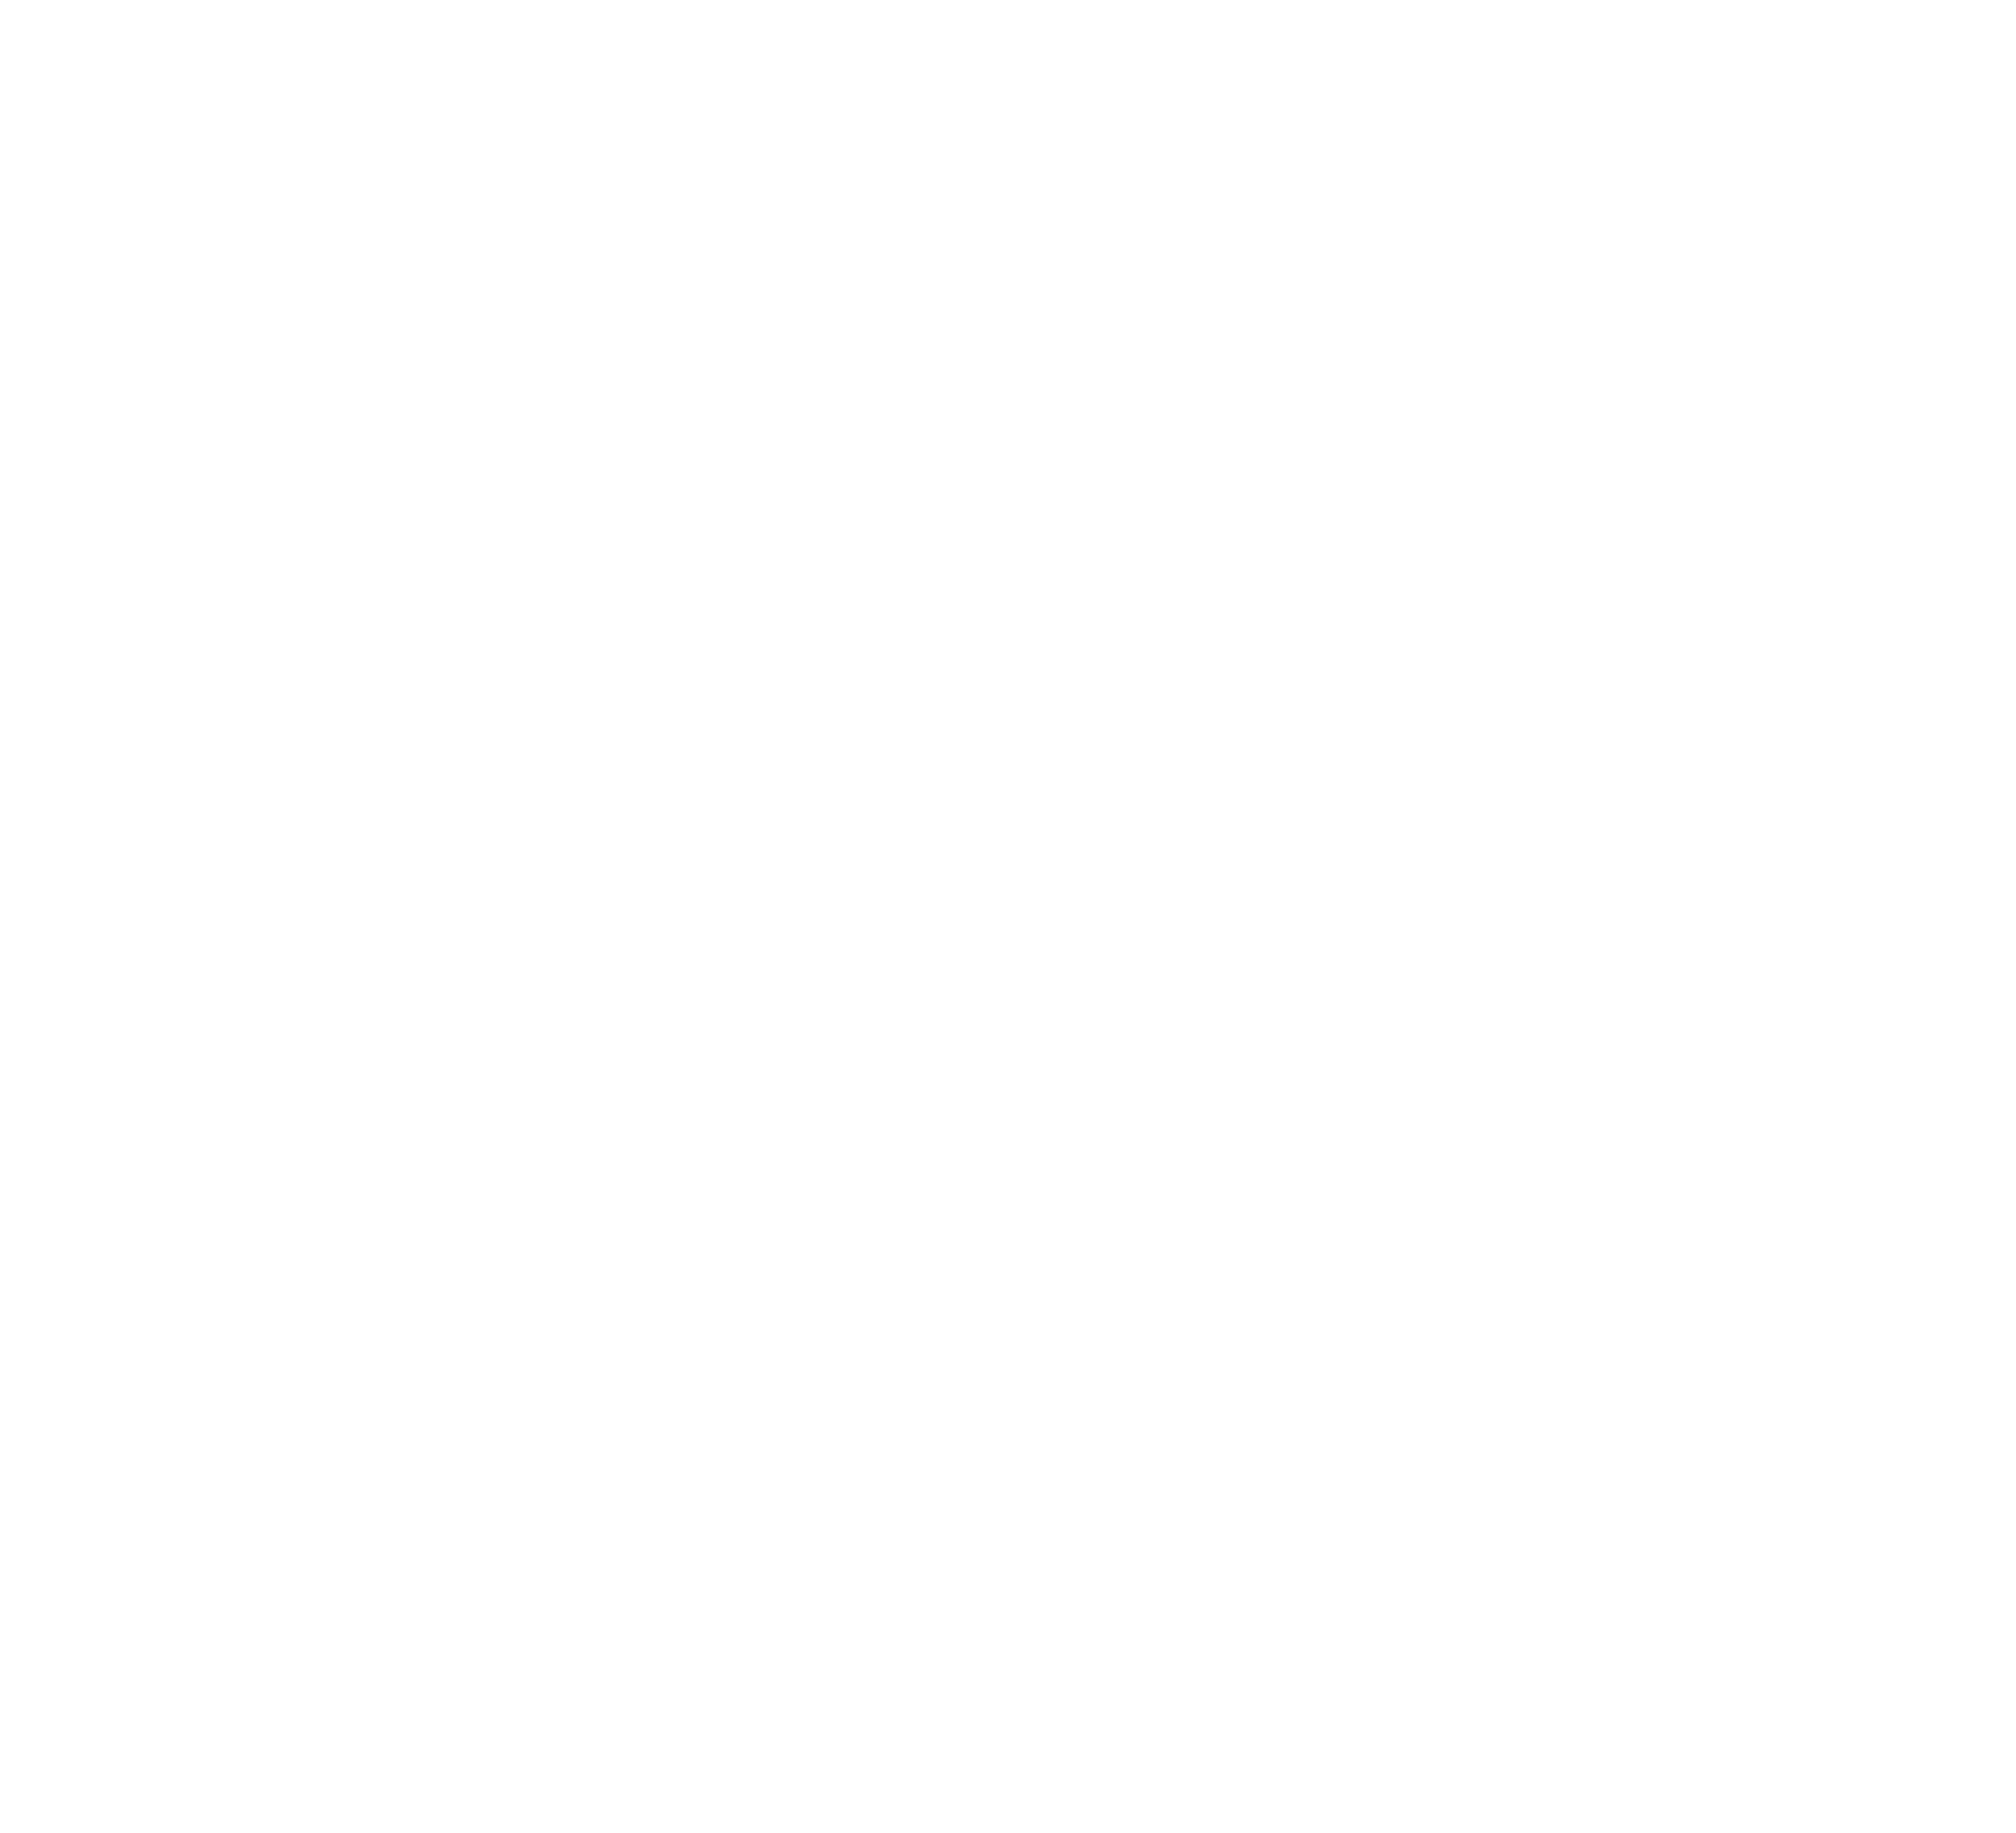

<IPython.core.display.Javascript object>


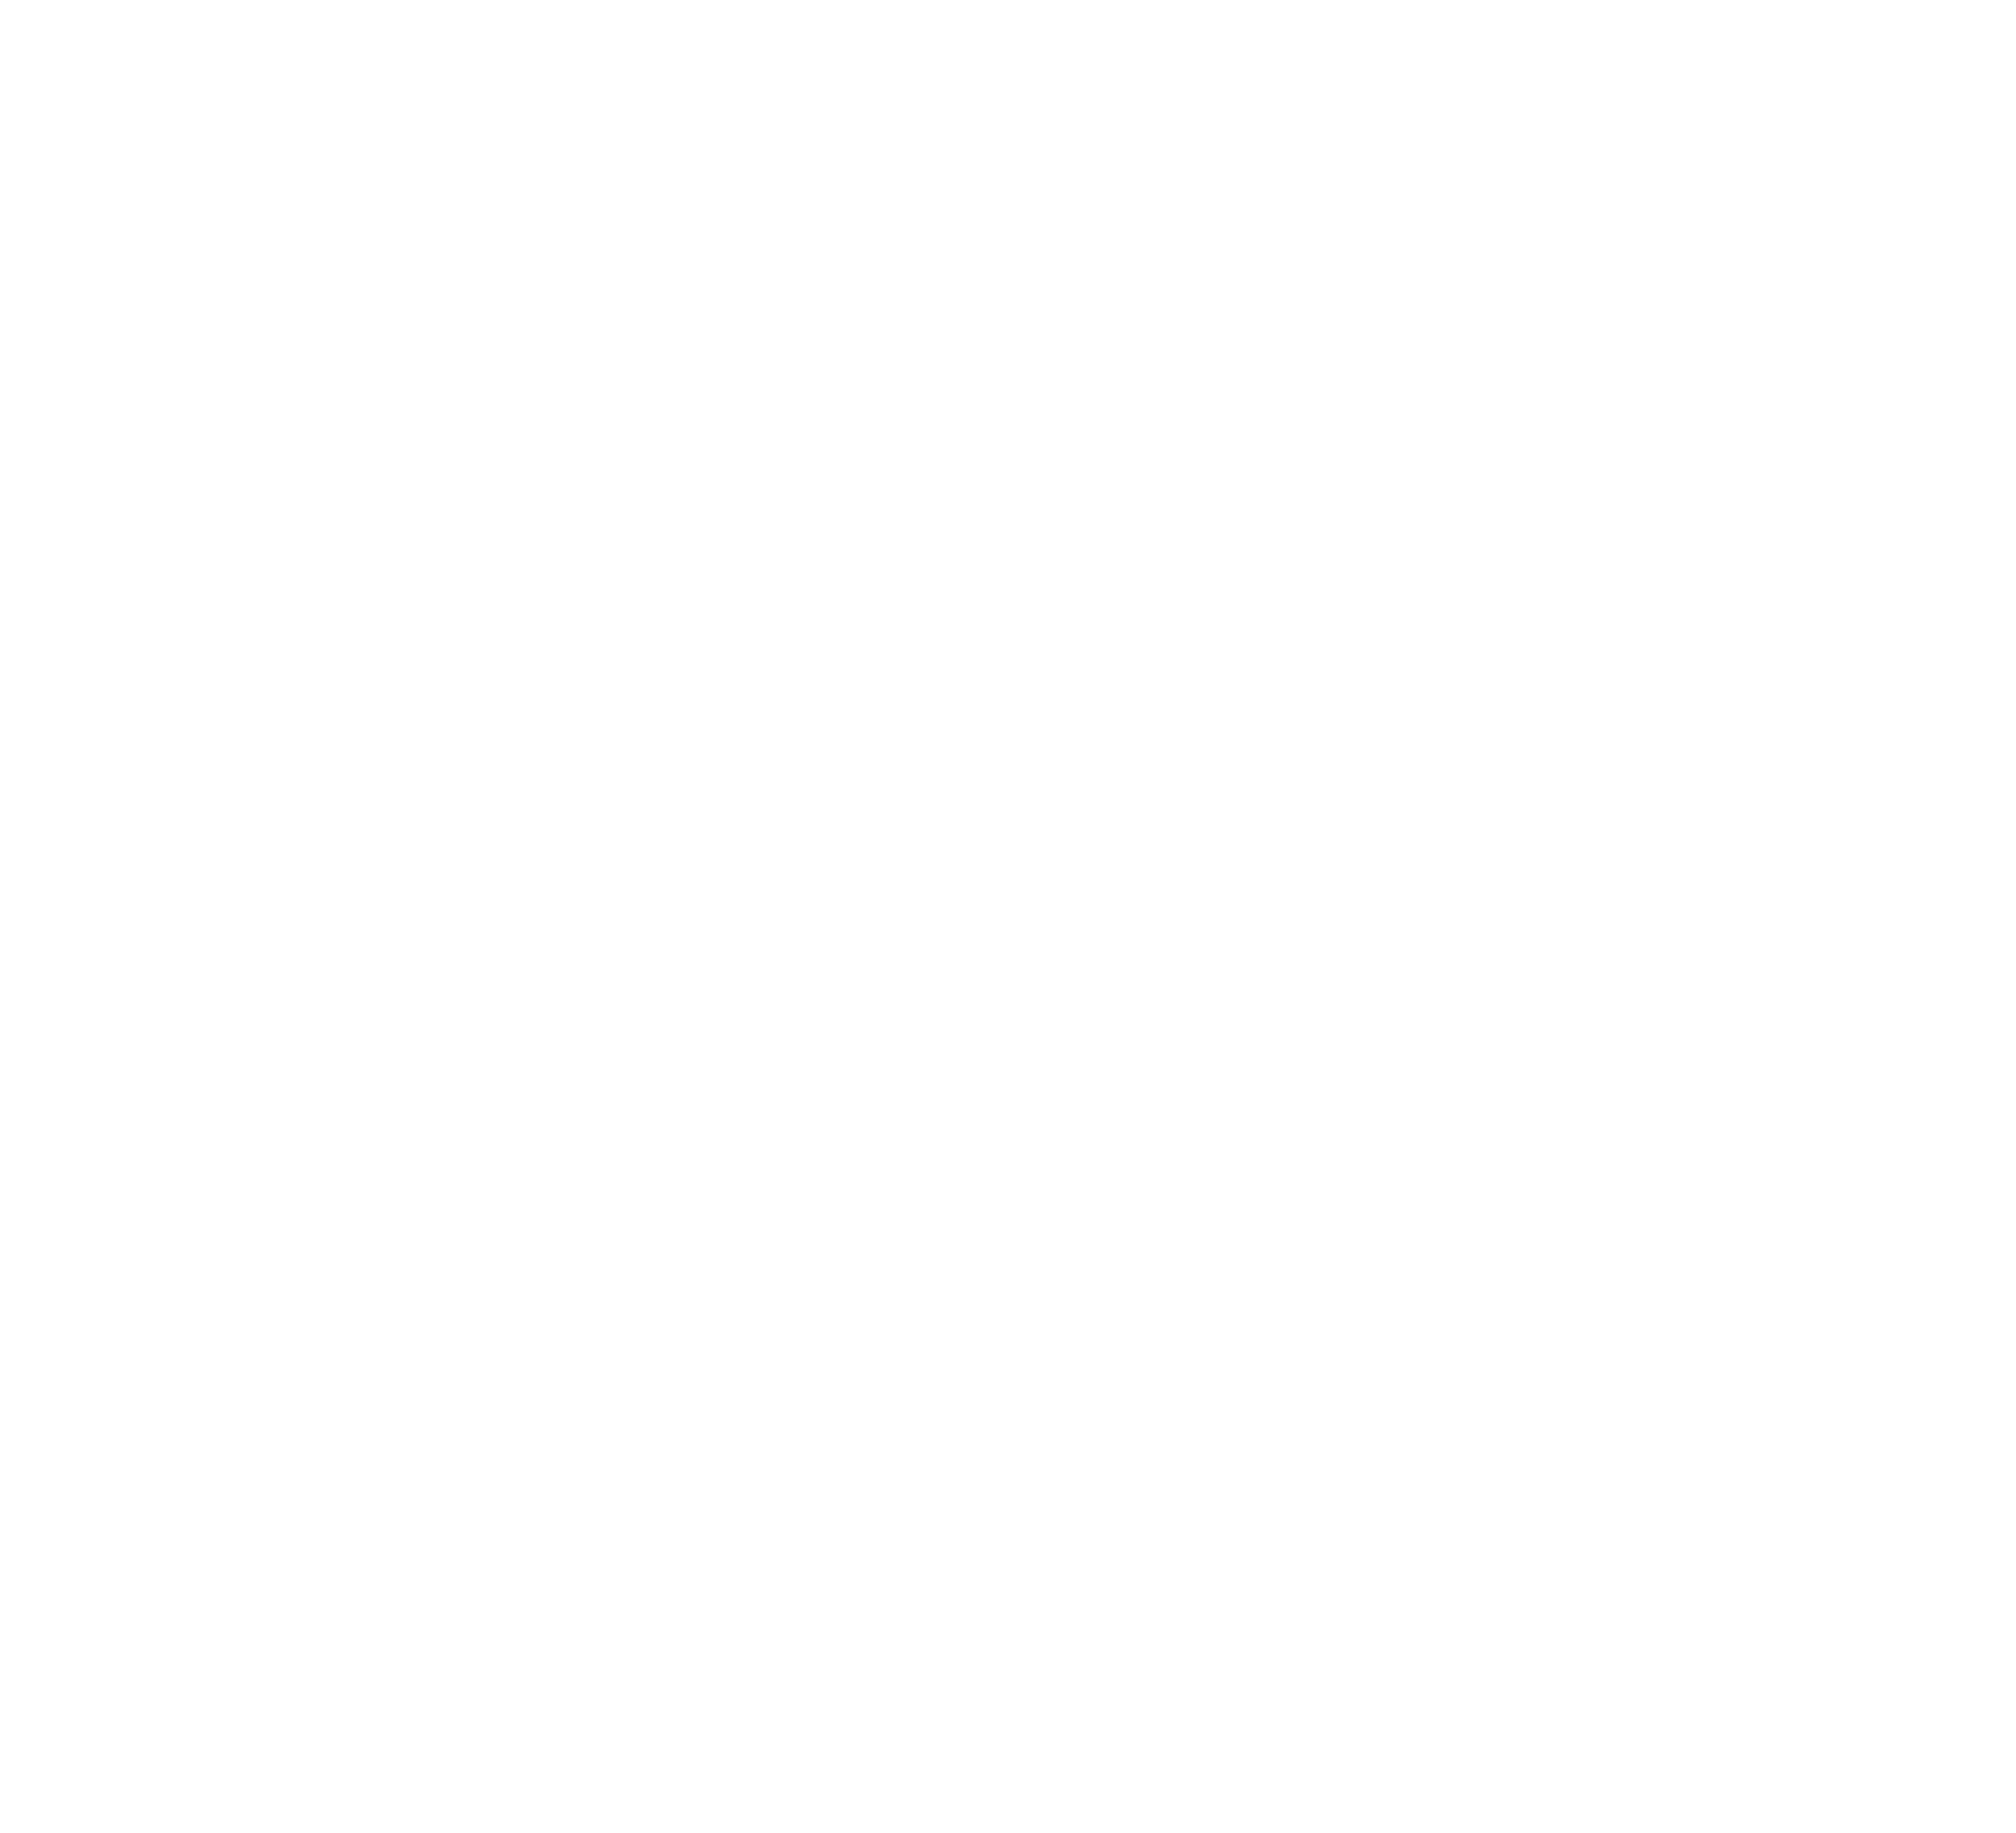

<IPython.core.display.Javascript object>


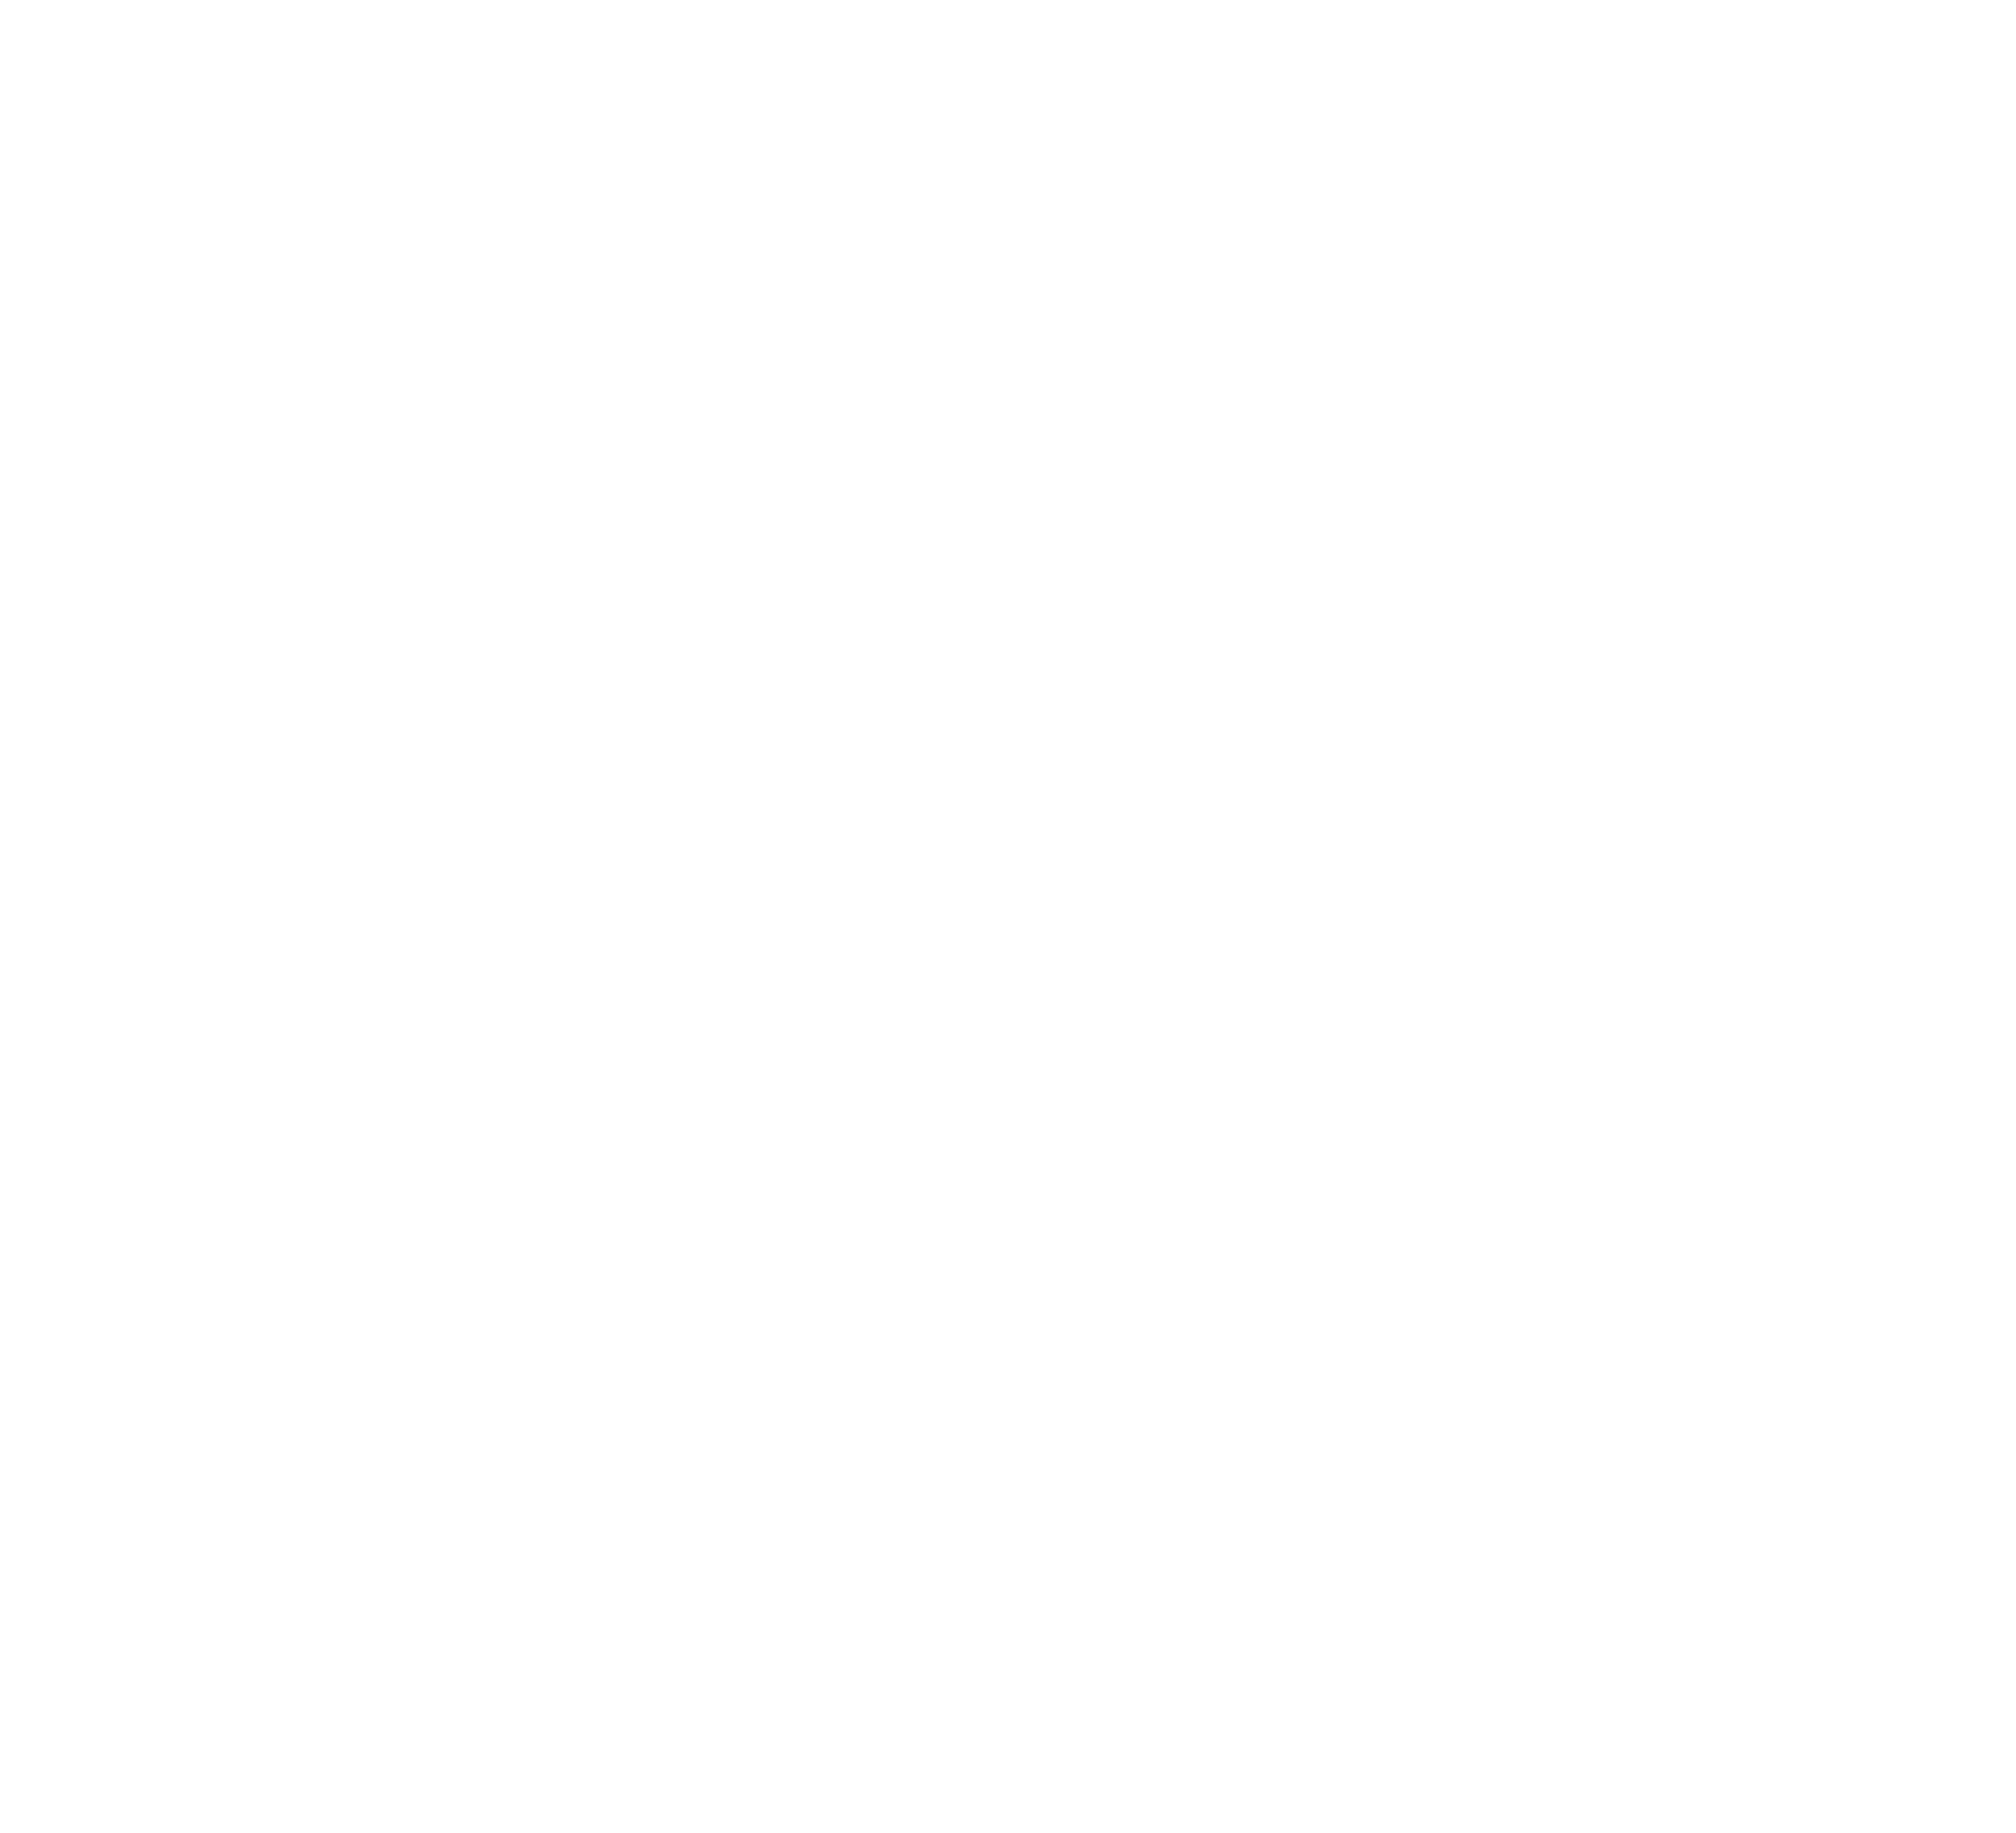

<IPython.core.display.Javascript object>


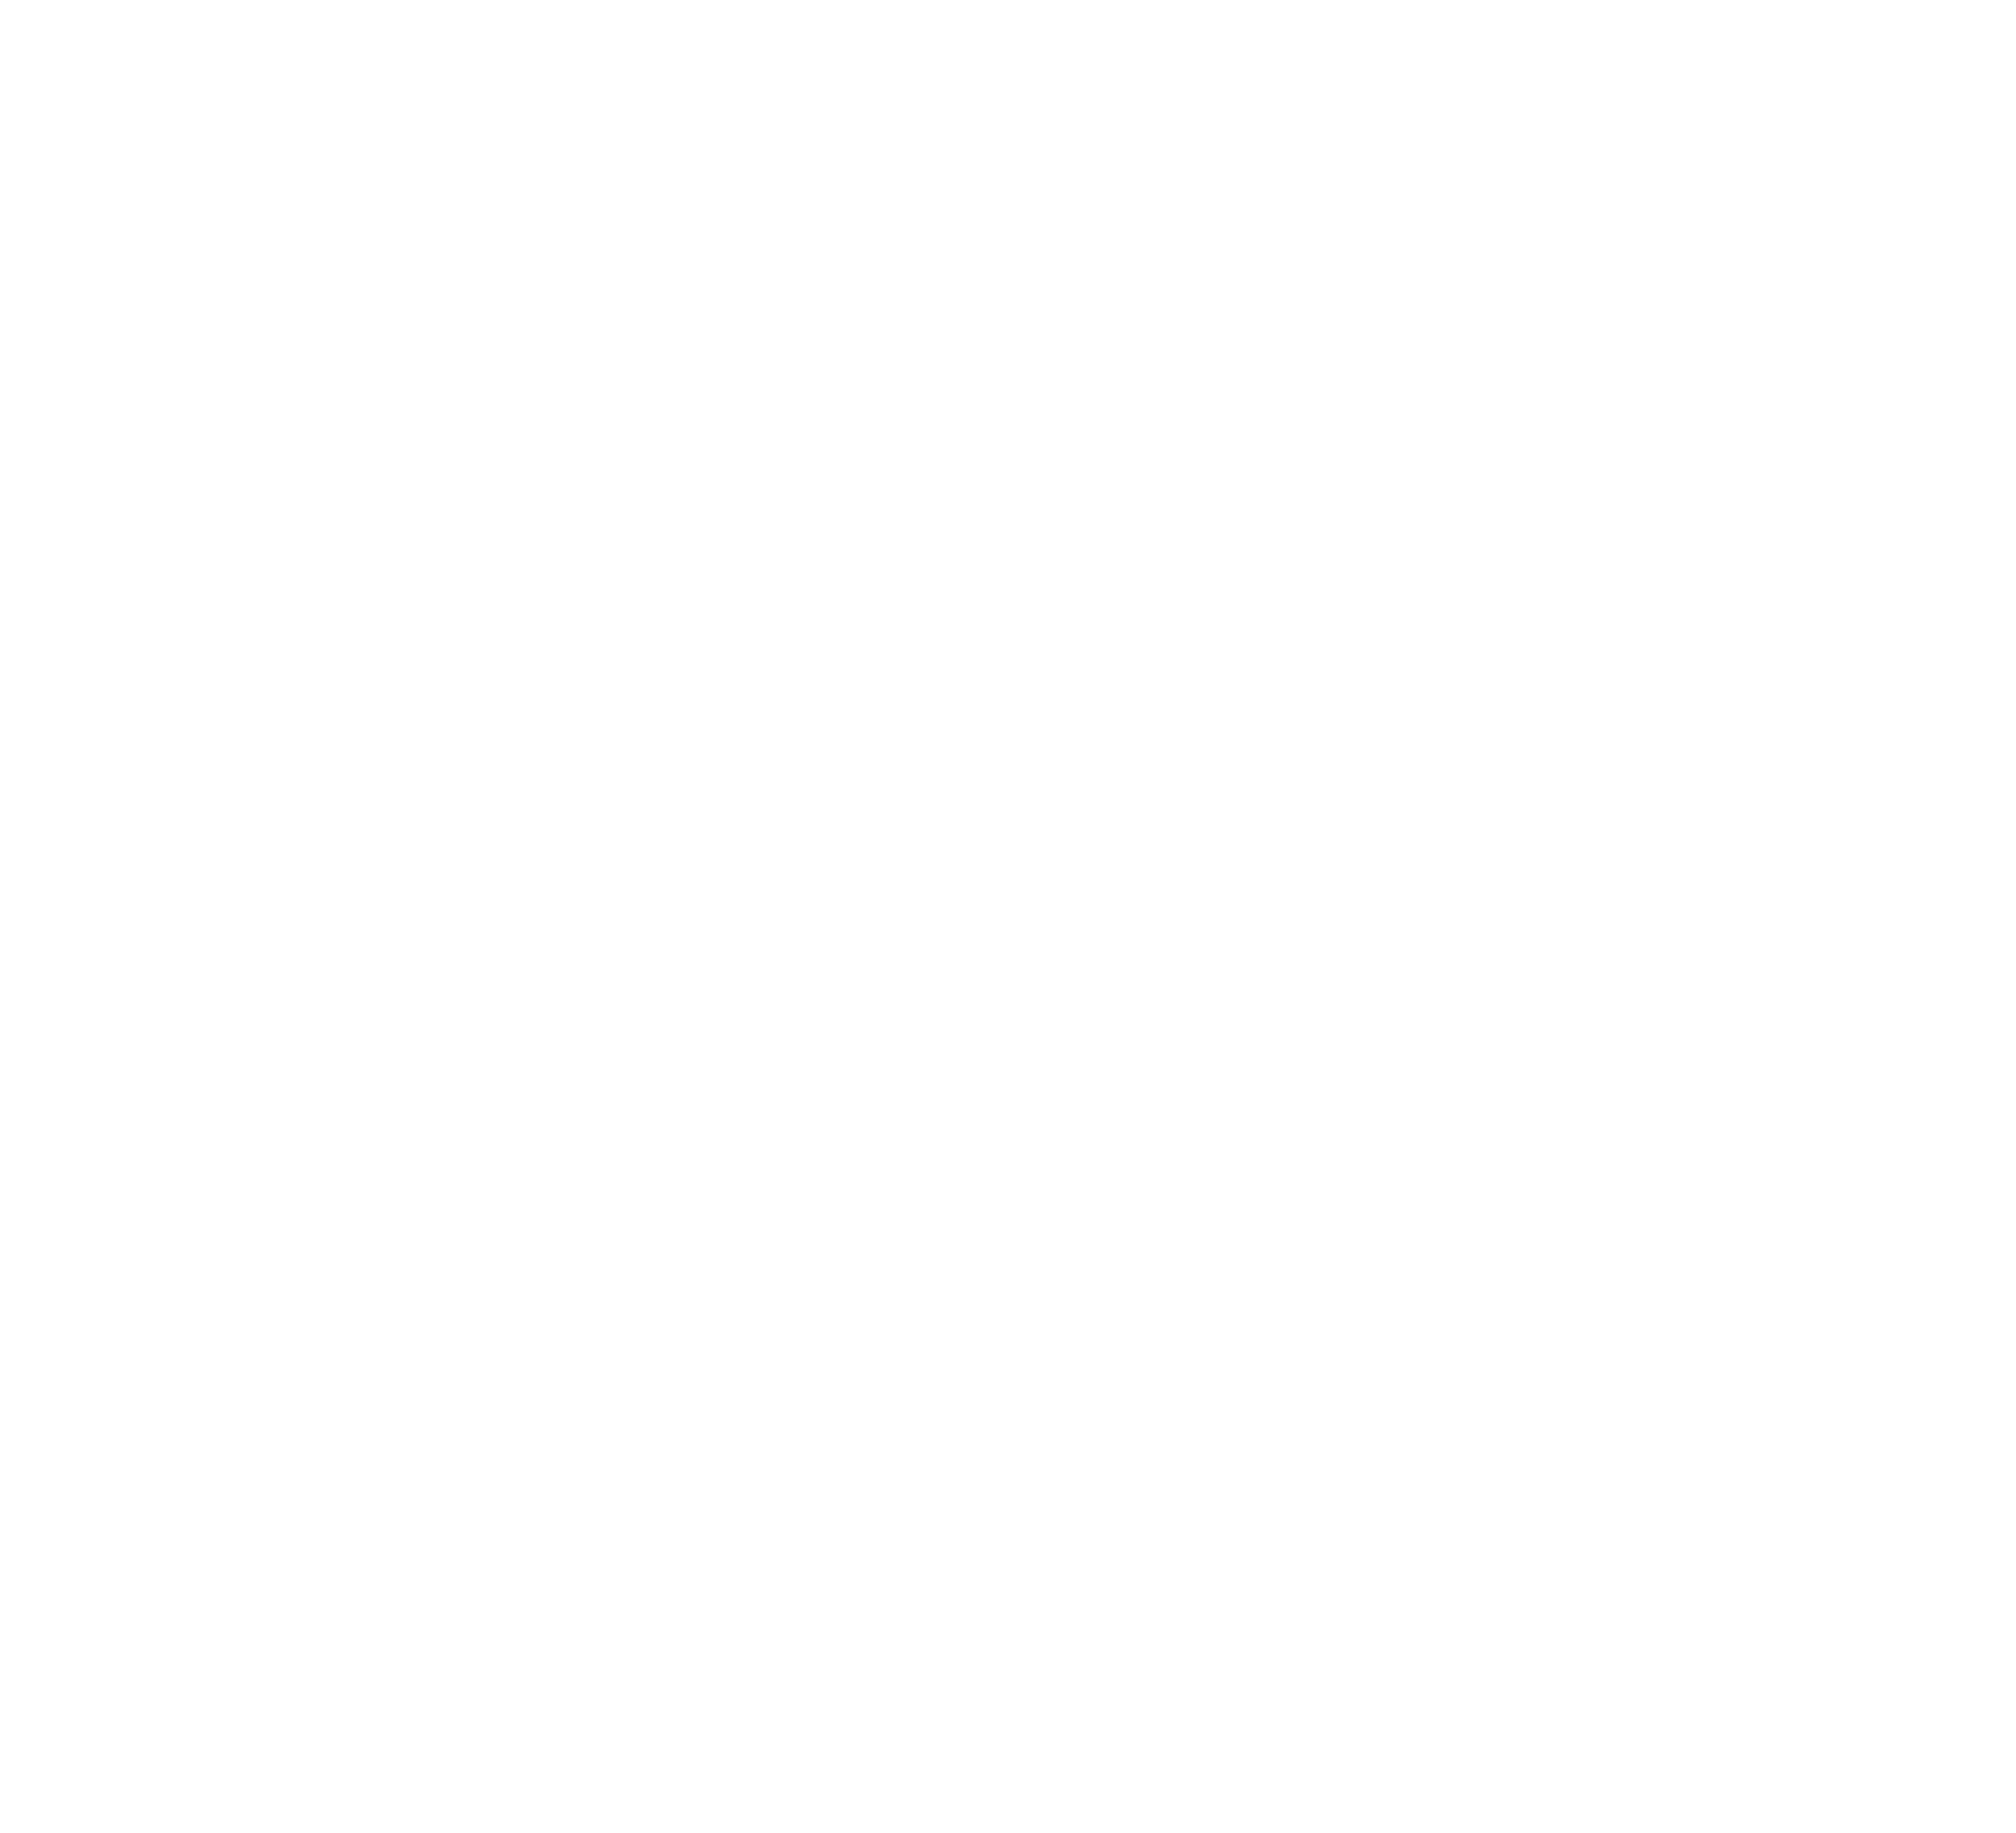

<IPython.core.display.Javascript object>


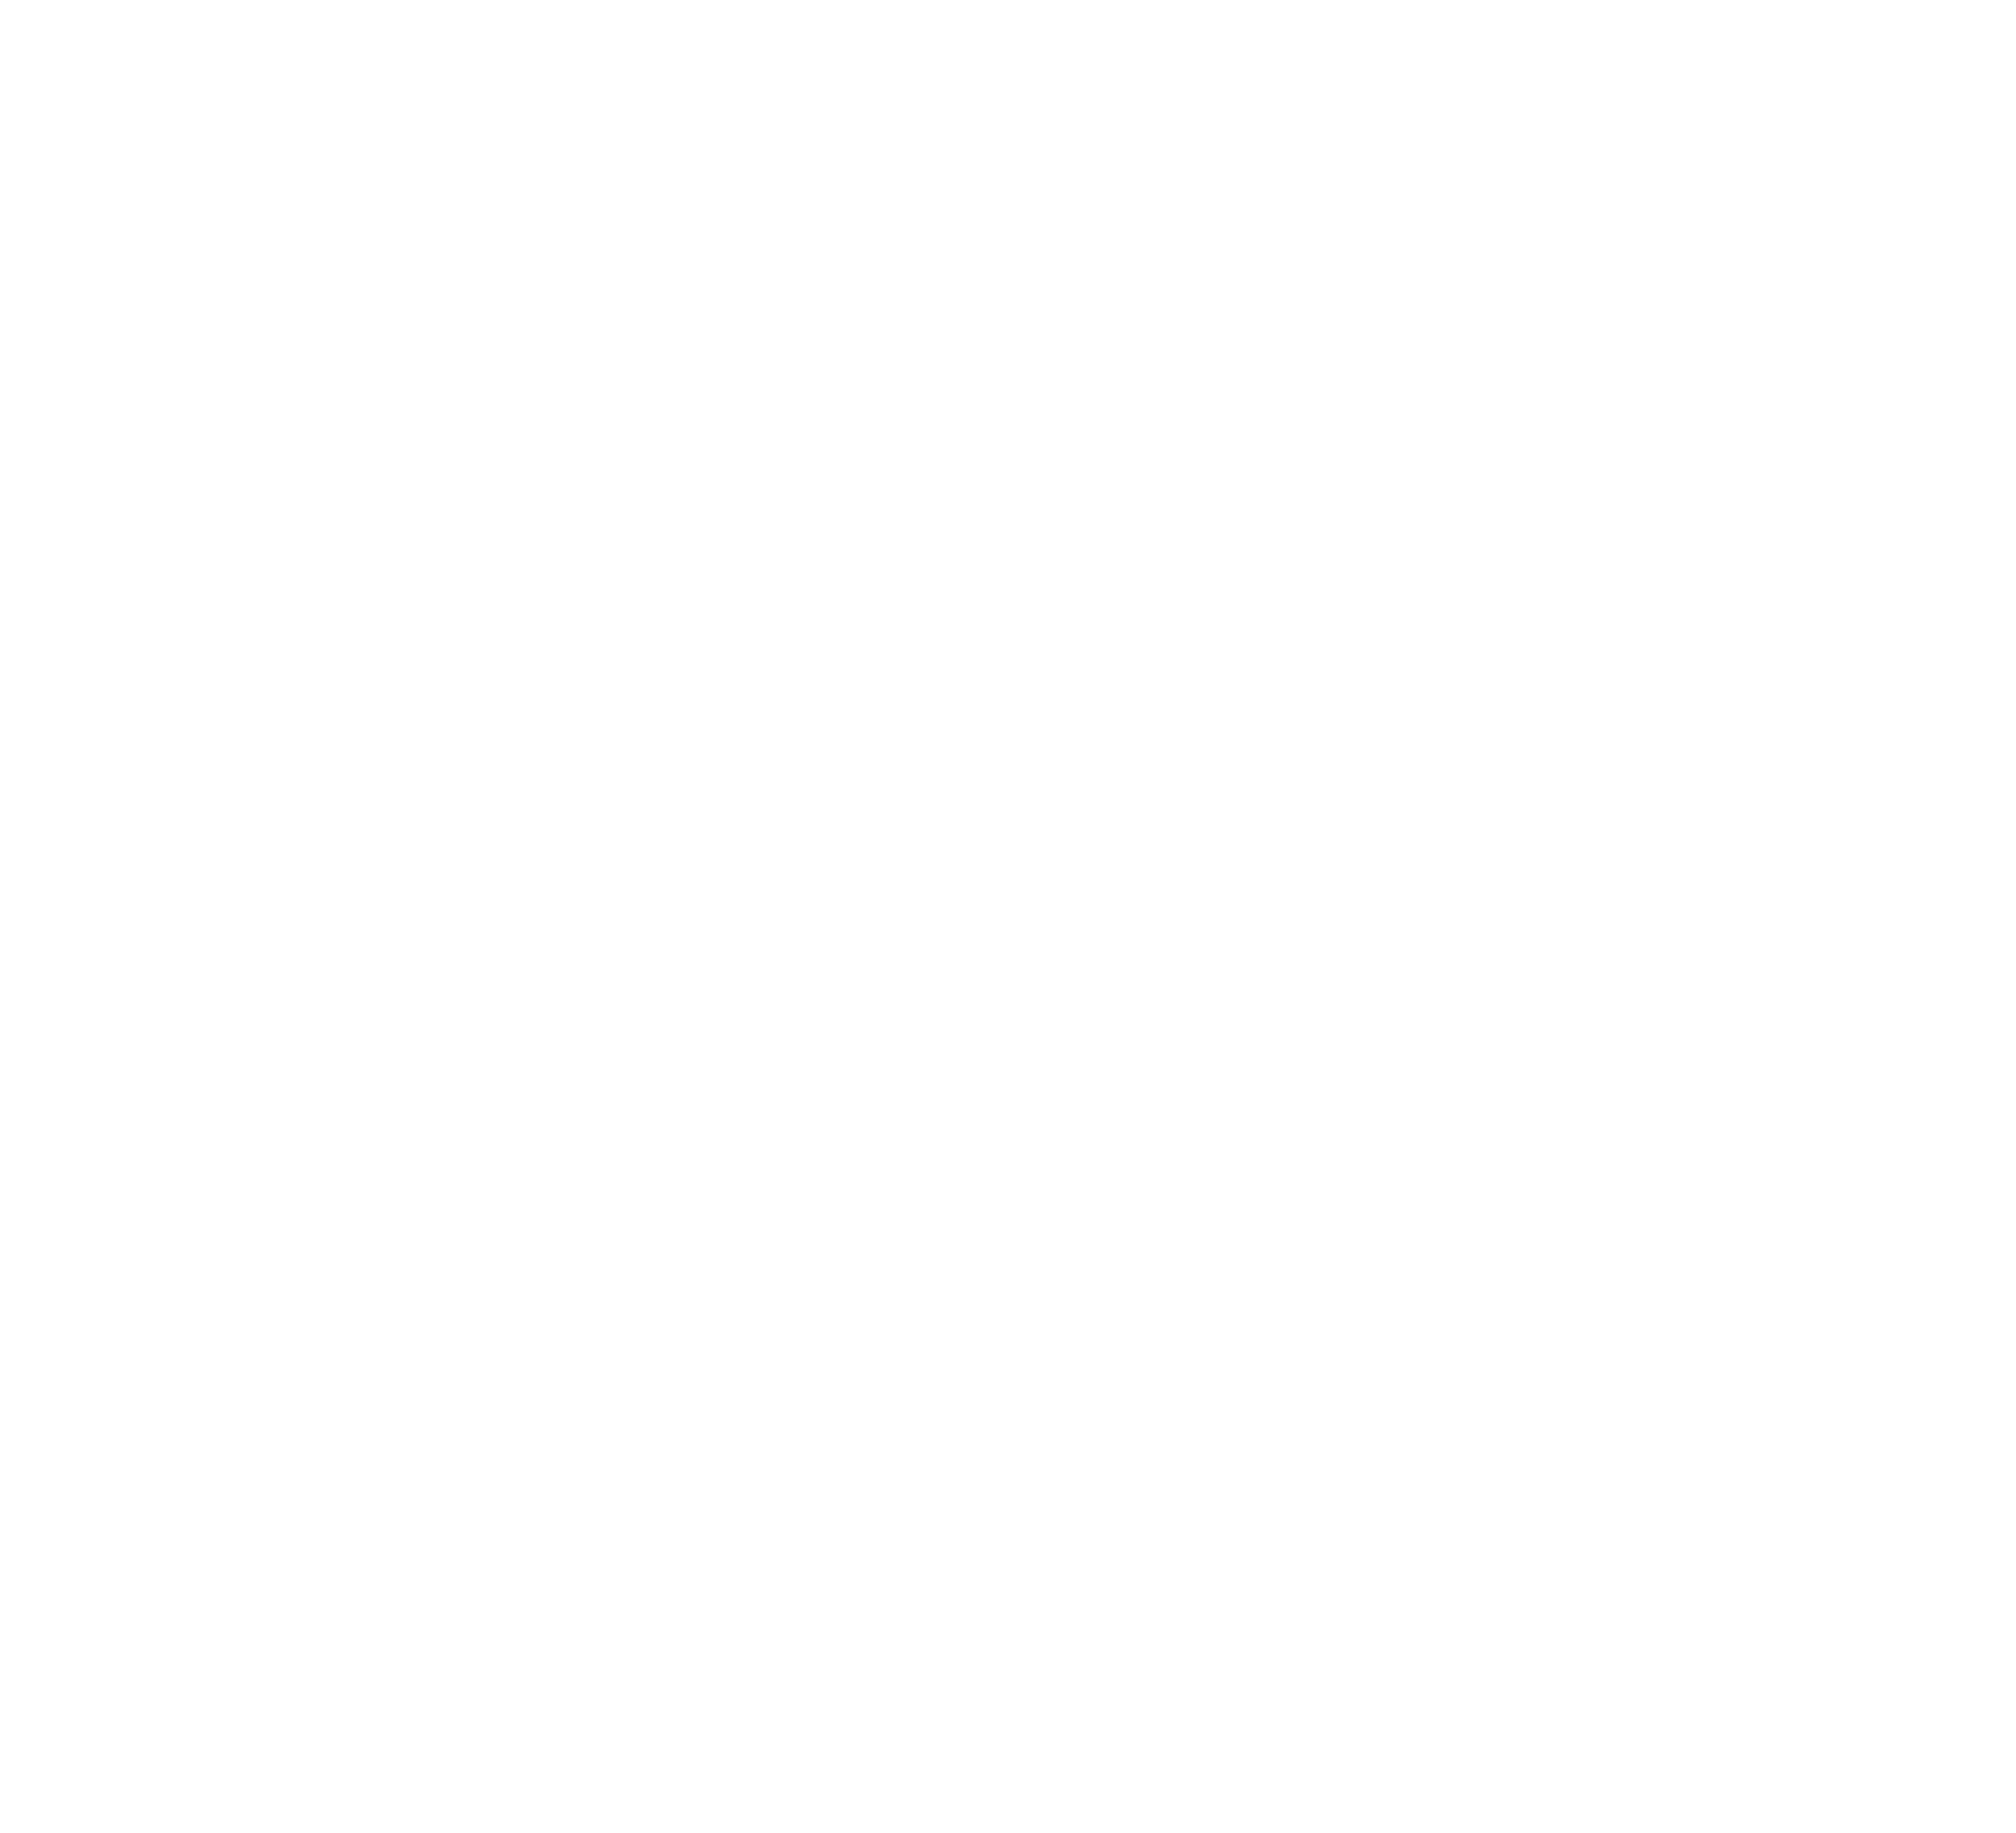

In [88]:
# %matplotlib notebook
i_fly = 0
with PdfPages(out_file) as pdf:
    # denoised dff
    for i_fly in np.arange(5):
        fig, axs = plt.subplots(ncols=4, nrows=6, figsize=(11, 10), sharex=True, sharey=True)
        for i_trial in np.arange(4):
            plt.suptitle("dFF: " + preprocess_list[i_fly].fly_dir)
            if i_trial == 0:
                clim0 = [0, np.quantile(dicts[i_fly]["dff_means"][i_trial], 0.98)]
                clim1 = 100
                axs[1, 0].set_title("difference. clim = {}".format(clim1))
                clim2 = [0, np.quantile(dicts[i_fly]["dff_stds"][i_trial], 0.98)]
                clim3 = 50
                axs[3, 0].set_title("difference. clim = {}".format(clim3))
                clim4 = [0, np.quantile(dicts[i_fly]["dff_quants"][i_trial], 0.98)]
                clim5 = 200
                axs[5, 0].set_title("difference. clim = {}".format(clim5))
            axs[0, i_trial].imshow(dicts[i_fly]["dff_means"][i_trial], clim=clim0)
            axs[0, i_trial].set_title("mean dFF: "+ preprocess_list[i_fly].trial_names[i_trial])
            axs[1, i_trial].imshow(dicts[i_fly]["dff_mean_diffs"][i_trial], clim=[-clim1, clim1], cmap=plt.cm.get_cmap("seismic"))
            axs[2, i_trial].imshow(dicts[i_fly]["dff_stds"][i_trial], clim=clim2)
            axs[2, i_trial].set_title("std dFF: "+ preprocess_list[i_fly].trial_names[i_trial])
            axs[3, i_trial].imshow(dicts[i_fly]["dff_std_diffs"][i_trial], clim=[-clim3, clim3], cmap=plt.cm.get_cmap("seismic"))
            axs[4, i_trial].imshow(dicts[i_fly]["dff_quants"][i_trial], clim=clim4)
            axs[4, i_trial].set_title("95% dFF: "+ preprocess_list[i_fly].trial_names[i_trial])
            axs[5, i_trial].imshow(dicts[i_fly]["dff_quant_diffs"][i_trial], clim=[-clim5,clim5], cmap=plt.cm.get_cmap("seismic"))

        fig.tight_layout()
        
        pdf.savefig(fig)
        plt.close(fig)
    
    # denoised green
    for i_fly in np.arange(5):
        fig, axs = plt.subplots(ncols=4, nrows=6, figsize=(11, 10), sharex=True, sharey=True)
        for i_trial in np.arange(4):
            plt.suptitle("fluorescence: " + preprocess_list[i_fly].fly_dir)
            if i_trial == 0:
                clim0 = [0, np.quantile(dicts[i_fly]["green_means"][i_trial], 0.98)]
                clim1 = 100
                axs[1, 0].set_title("difference. clim = {}".format(clim1))
                clim2 = [0, np.quantile(dicts[i_fly]["green_stds"][i_trial], 0.98)]
                clim3 = 50
                axs[3, 0].set_title("difference. clim = {}".format(clim3))
                clim4 = [0, np.quantile(dicts[i_fly]["green_quants"][i_trial], 0.98)]
                clim5 = 200
                axs[5, 0].set_title("difference. clim = {}".format(clim5))
            axs[0, i_trial].imshow(dicts[i_fly]["green_means"][i_trial], clim=clim0)
            axs[0, i_trial].set_title("mean F: "+ preprocess_list[i_fly].trial_names[i_trial])
            axs[1, i_trial].imshow(dicts[i_fly]["green_mean_diffs"][i_trial], clim=[-clim1, clim1], cmap=plt.cm.get_cmap("seismic"))
            axs[2, i_trial].imshow(dicts[i_fly]["green_stds"][i_trial], clim=clim2)
            axs[2, i_trial].set_title("std F: "+ preprocess_list[i_fly].trial_names[i_trial])
            axs[3, i_trial].imshow(dicts[i_fly]["green_std_diffs"][i_trial], clim=[-clim3, clim3], cmap=plt.cm.get_cmap("seismic"))
            axs[4, i_trial].imshow(dicts[i_fly]["green_quants"][i_trial], clim=clim4)
            axs[4, i_trial].set_title("95% F: "+ preprocess_list[i_fly].trial_names[i_trial])
            axs[5, i_trial].imshow(dicts[i_fly]["green_quant_diffs"][i_trial], clim=[-clim5,clim5], cmap=plt.cm.get_cmap("seismic"))

        fig.tight_layout()
        pdf.savefig(fig)
        plt.close(fig)
    """
    # raw dff
    for i_fly in np.arange(5):
        fig, axs = plt.subplots(ncols=4, nrows=6, figsize=(11, 10), sharex=True, sharey=True)
        for i_trial in np.arange(4):
            plt.suptitle("dFF: " + preprocess_list[i_fly].fly_dir)
            if i_trial == 0:
                clim0 = [0, np.quantile(dicts_raw[i_fly]["dff_means"][i_trial], 0.98)]
                clim1 = 100
                axs[1, 0].set_title("difference. clim = {}".format(clim1))
                clim2 = [0, np.quantile(dicts_raw[i_fly]["dff_stds"][i_trial], 0.98)]
                clim3 = 50
                axs[3, 0].set_title("difference. clim = {}".format(clim3))
                clim4 = [0, np.quantile(dicts_raw[i_fly]["dff_quants"][i_trial], 0.98)]
                clim5 = 200
                axs[5, 0].set_title("difference. clim = {}".format(clim5))
            axs[0, i_trial].imshow(dicts_raw[i_fly]["dff_means"][i_trial], clim=clim0)
            axs[0, i_trial].set_title("mean dFF: "+ preprocess_list[i_fly].trial_names[i_trial])
            axs[1, i_trial].imshow(dicts_raw[i_fly]["dff_mean_diffs"][i_trial], clim=[-clim1, clim1], cmap=plt.cm.get_cmap("seismic"))
            axs[2, i_trial].imshow(dicts_raw[i_fly]["dff_stds"][i_trial], clim=clim2)
            axs[2, i_trial].set_title("std dFF: "+ preprocess_list[i_fly].trial_names[i_trial])
            axs[3, i_trial].imshow(dicts_raw[i_fly]["dff_std_diffs"][i_trial], clim=[-clim3, clim3], cmap=plt.cm.get_cmap("seismic"))
            axs[4, i_trial].imshow(dicts_raw[i_fly]["dff_quants"][i_trial], clim=clim4)
            axs[4, i_trial].set_title("95% dFF: "+ preprocess_list[i_fly].trial_names[i_trial])
            axs[5, i_trial].imshow(dicts_raw[i_fly]["dff_quant_diffs"][i_trial], clim=[-clim5,clim5], cmap=plt.cm.get_cmap("seismic"))

        fig.tight_layout()
        
        pdf.savefig(fig)
        plt.close(fig)
    
    # raw green
    for i_fly in np.arange(5):
        fig, axs = plt.subplots(ncols=4, nrows=6, figsize=(11, 10), sharex=True, sharey=True)
        for i_trial in np.arange(4):
            plt.suptitle("fluorescence: " + preprocess_list[i_fly].fly_dir)
            if i_trial == 0:
                clim0 = [0, np.quantile(dicts_raw[i_fly]["green_means"][i_trial], 0.98)]
                clim1 = 100
                axs[1, 0].set_title("difference. clim = {}".format(clim1))
                clim2 = [0, np.quantile(dicts_raw[i_fly]["green_stds"][i_trial], 0.98)]
                clim3 = 50
                axs[3, 0].set_title("difference. clim = {}".format(clim3))
                clim4 = [0, np.quantile(dicts_raw[i_fly]["green_quants"][i_trial], 0.98)]
                clim5 = 200
                axs[5, 0].set_title("difference. clim = {}".format(clim5))
            axs[0, i_trial].imshow(dicts_raw[i_fly]["green_means"][i_trial], clim=clim0)
            axs[0, i_trial].set_title("mean F: "+ preprocess_list[i_fly].trial_names[i_trial])
            axs[1, i_trial].imshow(dicts_raw[i_fly]["green_mean_diffs"][i_trial], clim=[-clim1, clim1], cmap=plt.cm.get_cmap("seismic"))
            axs[2, i_trial].imshow(dicts_raw[i_fly]["green_stds"][i_trial], clim=clim2)
            axs[2, i_trial].set_title("std F: "+ preprocess_list[i_fly].trial_names[i_trial])
            axs[3, i_trial].imshow(dicts_raw[i_fly]["green_std_diffs"][i_trial], clim=[-clim3, clim3], cmap=plt.cm.get_cmap("seismic"))
            axs[4, i_trial].imshow(dicts_raw[i_fly]["green_quants"][i_trial], clim=clim4)
            axs[4, i_trial].set_title("95% F: "+ preprocess_list[i_fly].trial_names[i_trial])
            axs[5, i_trial].imshow(dicts_raw[i_fly]["green_quant_diffs"][i_trial], clim=[-clim5,clim5], cmap=plt.cm.get_cmap("seismic"))

        fig.tight_layout()
        pdf.savefig(fig)
        plt.close(fig)
        """

<IPython.core.display.Javascript object>


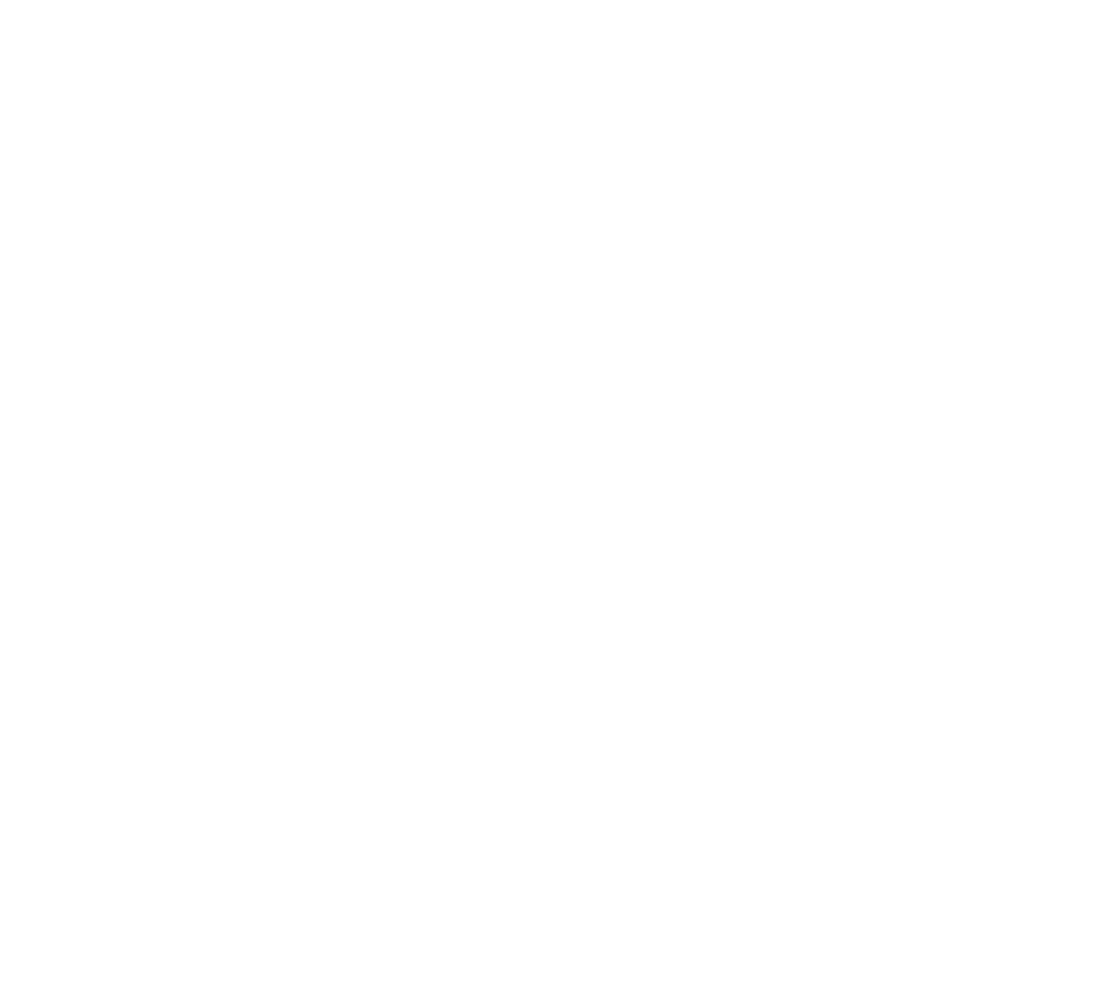

<IPython.core.display.Javascript object>


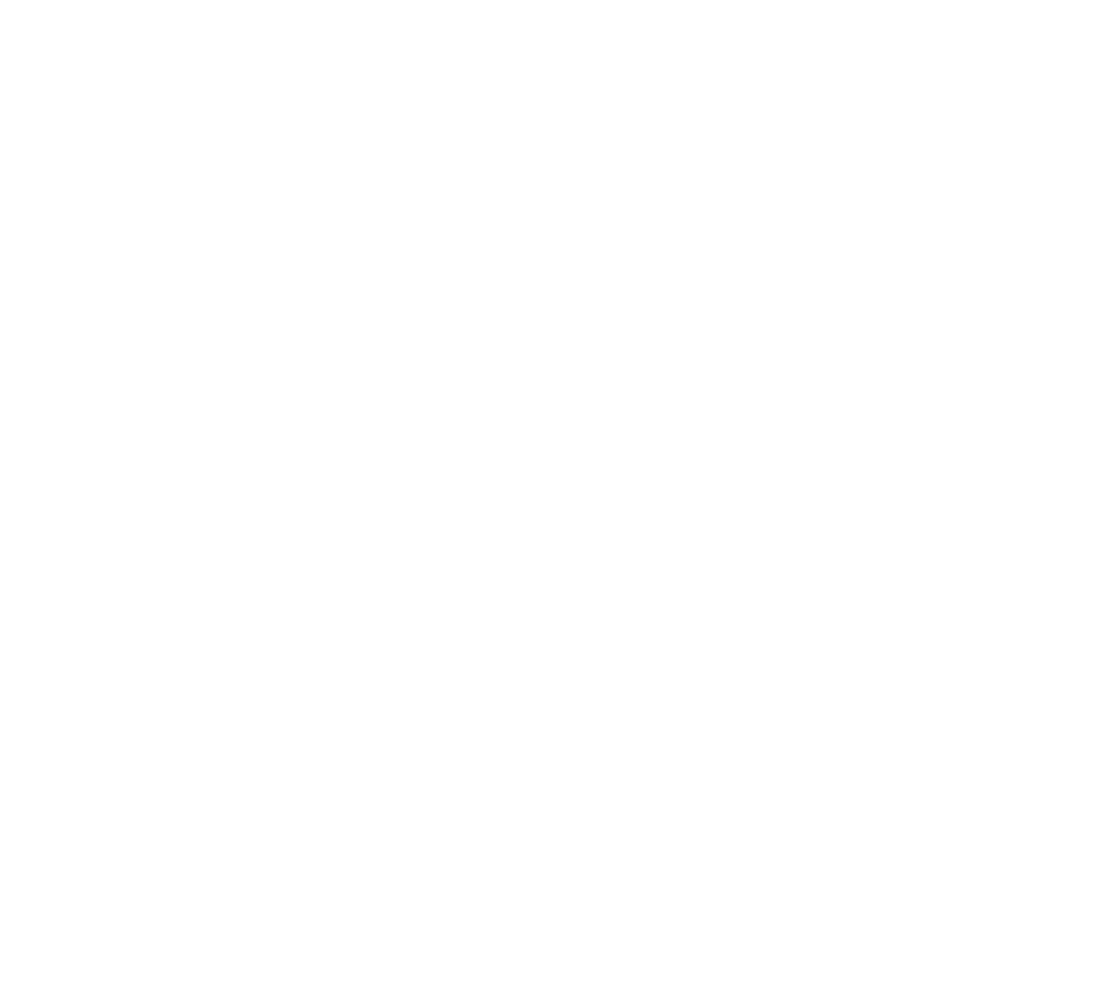

<IPython.core.display.Javascript object>


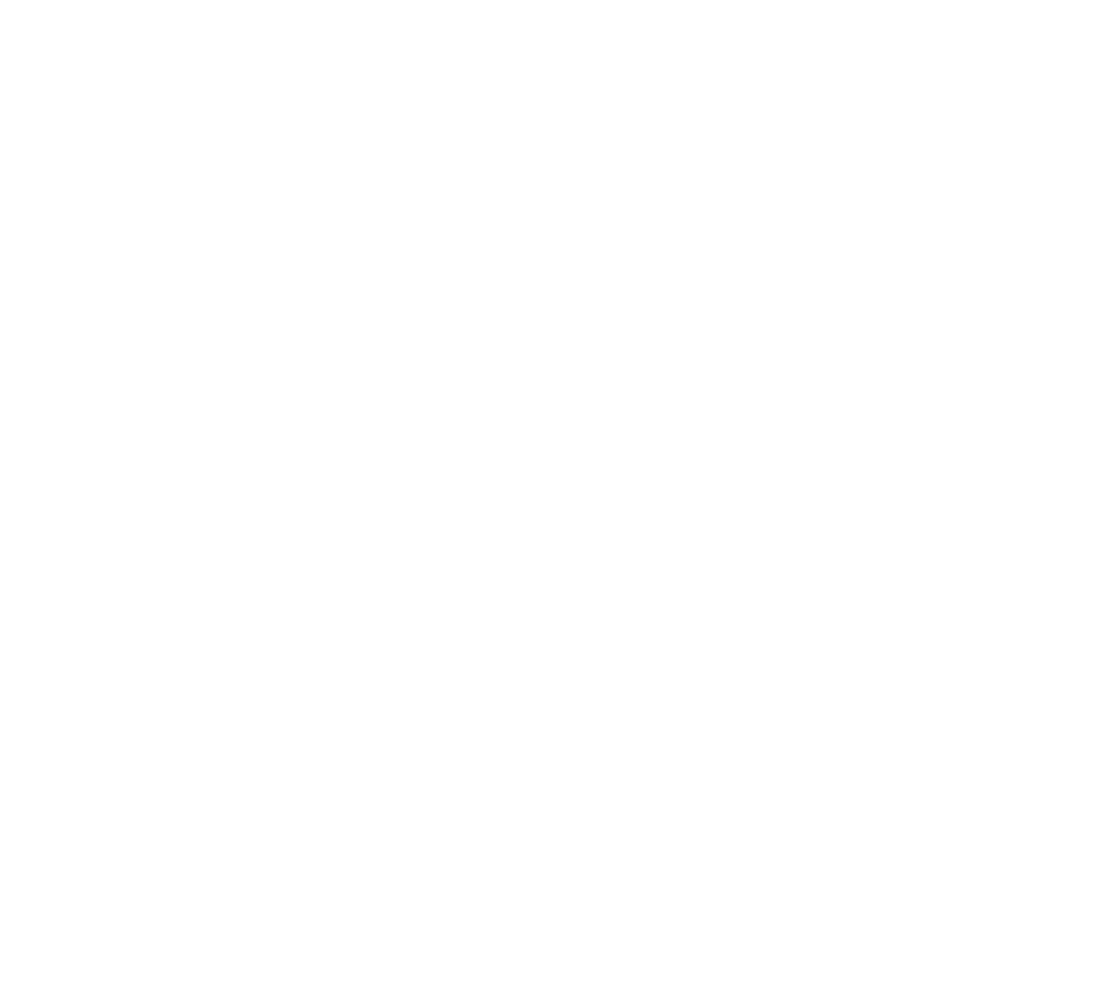

<IPython.core.display.Javascript object>


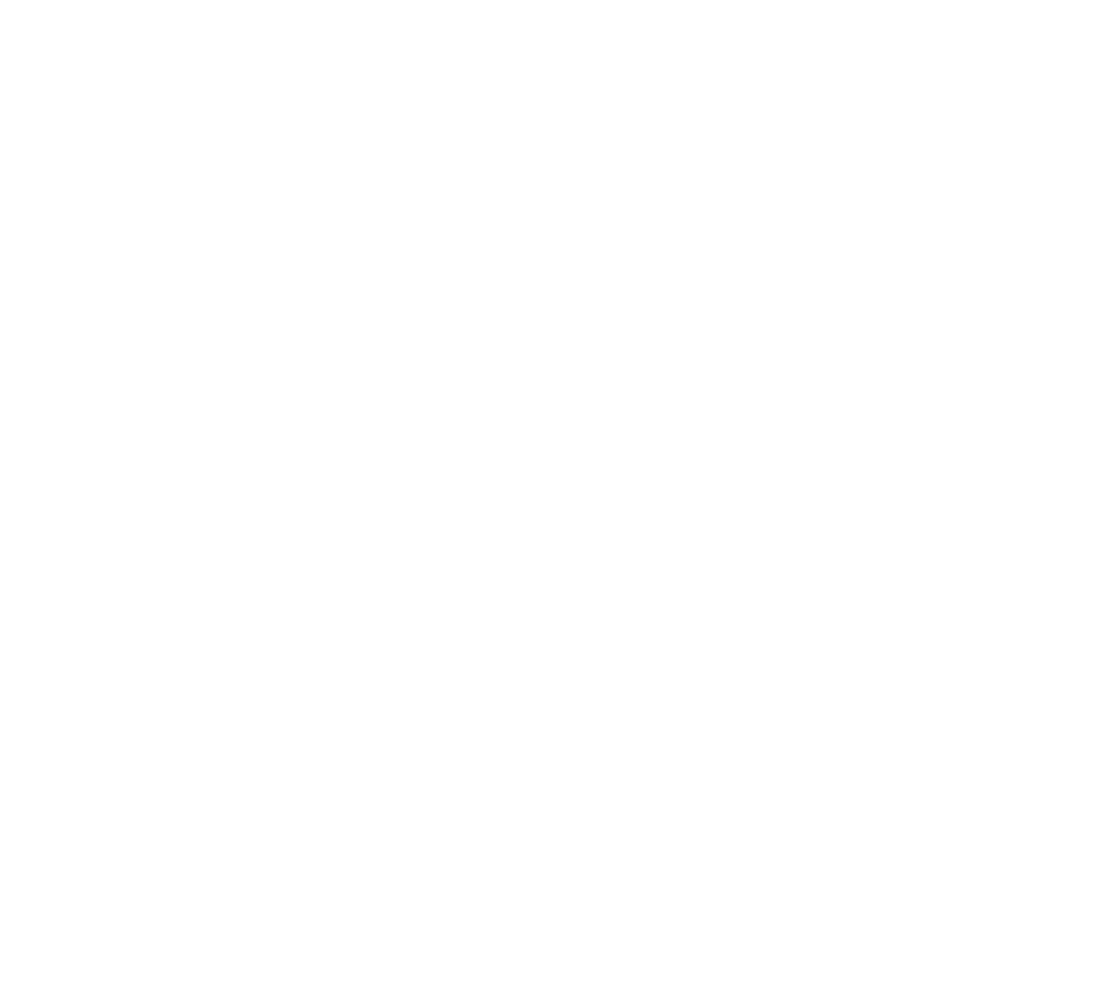

<IPython.core.display.Javascript object>


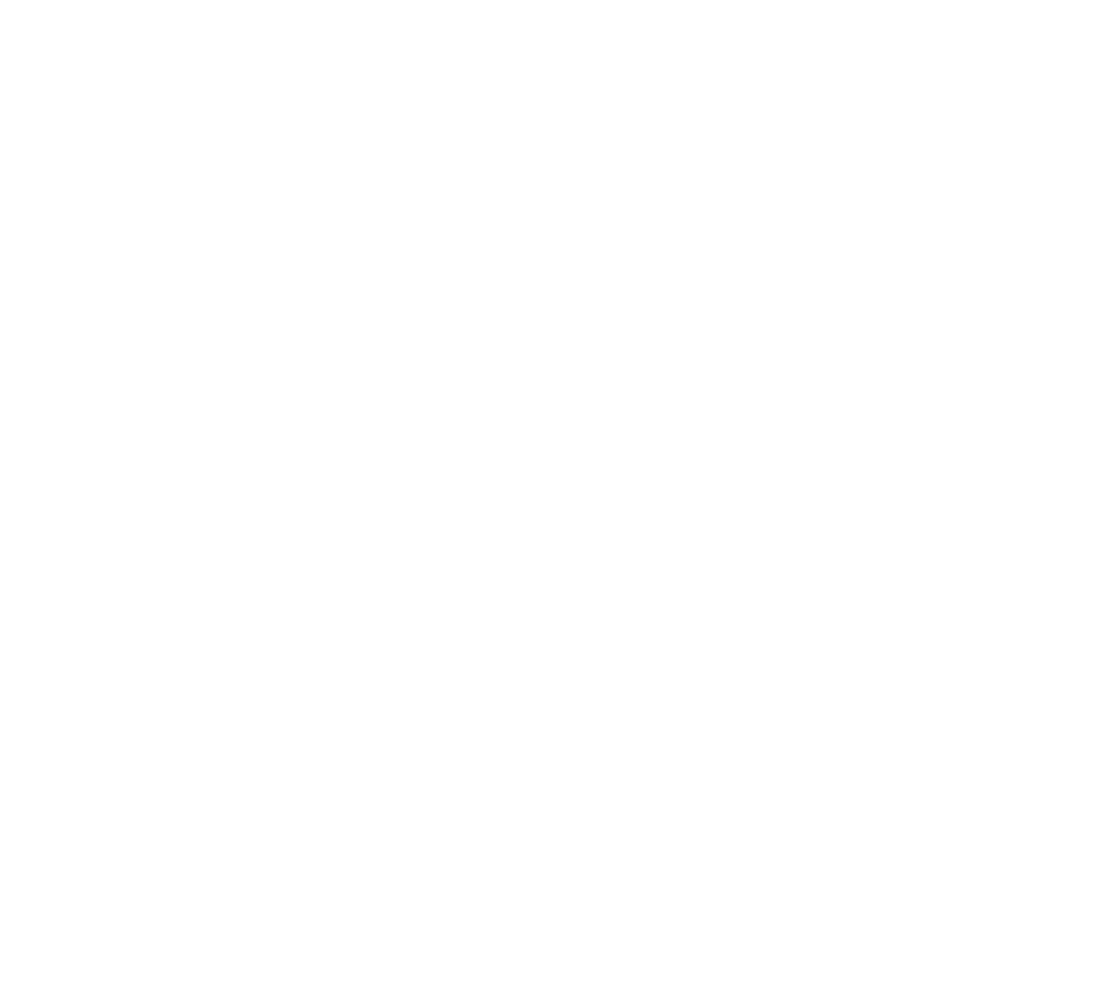

In [80]:
%matplotlib notebook
i_fly = 0
with PdfPages(out_file) as pdf:
    
        
        pdf.savefig(fig)
        plt.close(fig)
    